Привет, меня зовут Артём и я буду проверять твой проект.
<br>Небольшая вступительная часть и начнем работу)
<br> Если не против, то предлагаю общаться на «ты». Если это не удобно - дай знать, и мы перейдем на "вы". Моя основная цель — не указать на совершенные ошибки, а поделиться своим опытом и помочь сделать твой проект лучше. Для этого я буду использовать разный стиль оформления комментариев.
<div class="alert alert-block alert-success">
✔️ Все хорошо.
</div>

<div class="alert alert-warning">
⚠️ Критических замечаний нет, но есть возможность сделать твою работу лучше.
</div>

<div class="alert alert-block alert-danger">
❌ Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>


Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом.
Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> ...
</div>
Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии. Всё это поможет выполнить повторную проверку твоего проекта оперативнее».


# Проект. Улучшение baseline-модели
## Описание задачи
Мы работаем с учебным набором данных Яндекс Недвижимости, маркетплейсе для аренды и покупки жилой и коммерческой недвижимости. Наша задача — выступить надёжным посредником между арендодателями или продавцами и потенциальными арендаторами или покупателями, 
сделав процесс сделки максимально эффективным и безопасным для обеих сторон.
## Проблема
Мы выдвинули гипотезу, что стоимость объекта недвижимости можно объективно оценить извне — это устранит разногласия между сторонами и увеличит среднемесячное количество сделок на платформе. Вы разработали базовое решение в виде модели машинного обучения, а также организовали пайплайн данных в Airflow. Менеджеры убедились, что ваша модель потенциально прибыльна, однако вместе с тем сделали вывод, что метрики модели можно улучшить. 
## Бизнес-задача
Нужно оптимизировать подход, основываясь на первоначально построенном решении и настроенном пайплайне данных. Цель — сделать процесс воспроизводимым и улучшить ключевые модельные метрики, которые влияют на бизнес-показатели компании, в частности, на увеличение количества успешных сделок. Чтобы провести большое число экспериментов и обеспечить их воспроизводимость, для начала интегрируйте MLflow.
## Задача машинного обучения
Процесс прогнозирования стоимости требует доработки. Используя методы конструирования и отбора признаков, а также применяя алгоритмы для поиска оптимальных гиперпараметров модели, постараемся достичь лучших метрик, которые влияют на точность предсказаний стоимости недвижимости 
и, как следствие, на количество успешных сделок на маркетплейсе. В процессе работы будем документировать все эксперименты, используя MLflow, — это позволит отслеживать изменения в метриках и вносимые улучшения. 
Все успешные версии моделей будут зарегистрированы в соответствующем реестре MLflow, чтобы вы могли их отслеживать, сравнивать и использовать впоследствии. Это не только систематизирует процесс разработки и оценки моделей, но и обеспечит воспроизводимость результатов. 
## Данные
Чтобы улучшить модель прогнозирования стоимости, мы будем работать с данными, подготовленными и предобработанными с помощью пайплайна в Airflow. 
На прошлом этапе мы взяли набор предоставленный Яндекс.Недвижимостью, и заменили имеющиеся там мало иноформативные координаты на название ближайшей станции метро и расстояния до неё, как критически важные факторы для квартир в Москве.

## Подготовка к работе
### Создайте виртуальную среду и установите необходимые библиотеки
В командной строке создайте папку для проекта(опционально)
*cd mle_projects/your_git_project*
# обновление локального индекса пакетов
*sudo apt-get update*
# установка расширения для виртуального пространства
*sudo apt-get install python3.10-venv*
# создание виртуального пространства
*python3.10 -m venv .venv_project_name*
# активировать виртуальное пространство
*source .venv_project_name/bin/activate*
# установить необхоидмые бибилотеки
*pip install -r requirements.txt*
### Создайте файл с окружениями .env
Ориентируйтесь на шаблон .template_emv.
Убедтесь, что S3_BUCKET_NAME=s3-student-mle-20250130-833968fcc1 - это важно для корректной работы проекты.
### Запустите ML-Flow Registry Server
 Выполните в командной строке активацию сервера:
 *sh run_mlflow_server.sh* [#Здесь находится файл с настройками сервера](https://github.com/AlexKretov/yn/blob/06abedc2dce9a72f979d40b30d7b322513b8cf61/run_mlflow_server.sh)


#### Этап 1 Загрузка данных

In [84]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
from mlflow.client import MlflowClient
import numpy as np
import matplotlib.colors as mcolors

from autofeat import AutoFeatRegressor
from catboost import CatBoostRegressor
import catboost as cb
import numpy as np
import warnings
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, KBinsDiscretizer, PolynomialFeatures, OneHotEncoder, LabelEncoder, TargetEncoder
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import random
from sklearn.feature_selection import VarianceThreshold
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.linear_model import Lars
import optuna
from optuna.samplers import TPESampler
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from matplotlib.lines import Line2D
import matplotlib.ticker as ticker

In [3]:
TRACKING_SERVER_HOST = "127.0.0.1"
TRACKING_SERVER_PORT = 5000

EXPERIMENT_NAME = "eda_exp" # напишите название вашего эксперимента
RUN_NAME = "eda"

ASSETS_DIR = "assets"

os.makedirs(ASSETS_DIR, exist_ok=True)

pd.options.display.max_columns = 100
pd.options.display.max_rows = 64

sns.set_style("white")
sns.set_theme(style="whitegrid")


In [4]:
os.environ["MLFLOW_S3_ENDPOINT_URL"] = "https://storage.yandexcloud.net" #endpoint бакета от YandexCloud
os.environ["AWS_ACCESS_KEY_ID"] = os.getenv("AWS_ACCESS_KEY_ID") # получаем id ключа бакета, к которому подключён MLFlow, из .env
os.environ["AWS_SECRET_ACCESS_KEY"] = os.getenv("AWS_SECRET_ACCESS_KEY") # получаем ключ бакета, к которому подключён MLFlow, из .env

mlflow.set_tracking_uri(f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}")
mlflow.set_registry_uri(f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}")

In [5]:
def get_artifact_runID(name):
   """
   Функция для получения run_id артефакта по его имени.

   Параметры:
   ----------
   name : str
       Имя артефакта.

   Возвращает:
   ----------
   str
       run_id артефакта.
   """
   exp_ids = []
   exps = client.search_experiments()
   got = False
   for e in exps:
       if not got:
           exp_ids.append(e.experiment_id)
           for e_id in exp_ids:
               runs = client.search_runs(e_id)
               for run in runs:
                   if run.info.status != 'FAILED' and not got:
                       artifacts = client.list_artifacts(run.info.run_id)
                       try:
                           if name in str(artifacts):
                               run_id = run.info.run_id
                               print(run_id)
                               got = True
                       except:
                           pass
   return run_id

In [6]:
client = MlflowClient()
run_id = get_artifact_runID("initial_data.csv")
local_path = client.download_artifacts(run_id, "initial_data.csv", 'data')
df = pd.read_csv(local_path)
df.sample(5)

54dbca04c6b24611bfac88c4a0b84396


,floor,is_apartment,kitchen_area,living_area,rooms,studio,total_area,price,build_year,building_type_int,ceiling_height,flats_count,floors_total,has_elevator,nearest_metro,distance_to_metro
53873,9,False,8.0,20.000000,1,False,41.000000,14200000,2017,2,3.00,557,9,True,Рассказовка,0.951052
81209,5,False,9.2,32.299999,2,False,53.500000,12500000,1984,4,2.64,677,17,True,Минская,6.698478
38537,5,False,6.0,19.000000,1,False,33.000000,8000000,1976,4,2.64,287,9,True,Авиамоторная,16.409684
48327,3,False,8.0,29.000000,2,False,51.000000,12950000,1979,1,2.70,72,12,True,Парк Победы,1.983705
92486,7,False,8.4,30.000000,2,False,50.599998,11900000,2000,4,2.64,190,14,True,ЦСКА,10.794713


<div class="alert alert-block alert-success">
✔️ Отлично, все данные загружены.
</div>



#### Этап 2: Исследовательский Анализ Данных (EDA)

# <a id='toc1_'></a>[Знакомство с данными](#toc0_)

Загрузить данные в Jupyter Notebook, используя библиотеку pandas. Убедиться, что провели предварительную обработку данных, затронув пропущенные значения и преобразование типов данных.

In [7]:
df.isna().sum()

floor                0
is_apartment         0
kitchen_area         0
living_area          0
rooms                0
studio               0
total_area           0
price                0
build_year           0
building_type_int    0
ceiling_height       0
flats_count          0
floors_total         0
has_elevator         0
nearest_metro        0
distance_to_metro    0
dtype: int64

*Вывод:* Пропуски в данных отсутствуют.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127044 entries, 0 to 127043
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   floor              127044 non-null  int64  
 1   is_apartment       127044 non-null  bool   
 2   kitchen_area       127044 non-null  float64
 3   living_area        127044 non-null  float64
 4   rooms              127044 non-null  int64  
 5   studio             127044 non-null  bool   
 6   total_area         127044 non-null  float64
 7   price              127044 non-null  int64  
 8   build_year         127044 non-null  int64  
 9   building_type_int  127044 non-null  int64  
 10  ceiling_height     127044 non-null  float64
 11  flats_count        127044 non-null  int64  
 12  floors_total       127044 non-null  int64  
 13  has_elevator       127044 non-null  bool   
 14  nearest_metro      127044 non-null  object 
 15  distance_to_metro  127044 non-null  float64
dtypes:

*Вывод:* Типы данных соответствуют экономической сути колонок.

<div class="alert alert-block alert-success">
✔️ Есть первый взгляд на данные. Выводы верные.
</div>



# <a id='toc2_'></a>[Визуализация](#toc0_)
Визуализируем данные, построив графики при помощи библиотек Matplotlib и Seaborn, — так мы наглядно представим распределение признаков, в том числе целевую переменную.

In [11]:
def group_others(series):
   """
   Функция для группировки значений в серии.

   Параметры:
   ----------
   series : pandas.Series
       Серия значений.

   Возвращает:
   ----------
   pandas.Series
       Серия значений с группировкой.
   """
   # Получаем 10 самых крупных значений
   if len(series) > 10:
       top_values = series.nlargest(9)
       # Суммируем остальные значения
       others_sum = series[~series.isin(top_values)].sum()
       top_values['прочие'] = others_sum
   else:
       top_values = series.nlargest(len(series))
       top_values.index = [str(x) for x in top_values.index]

   return top_values


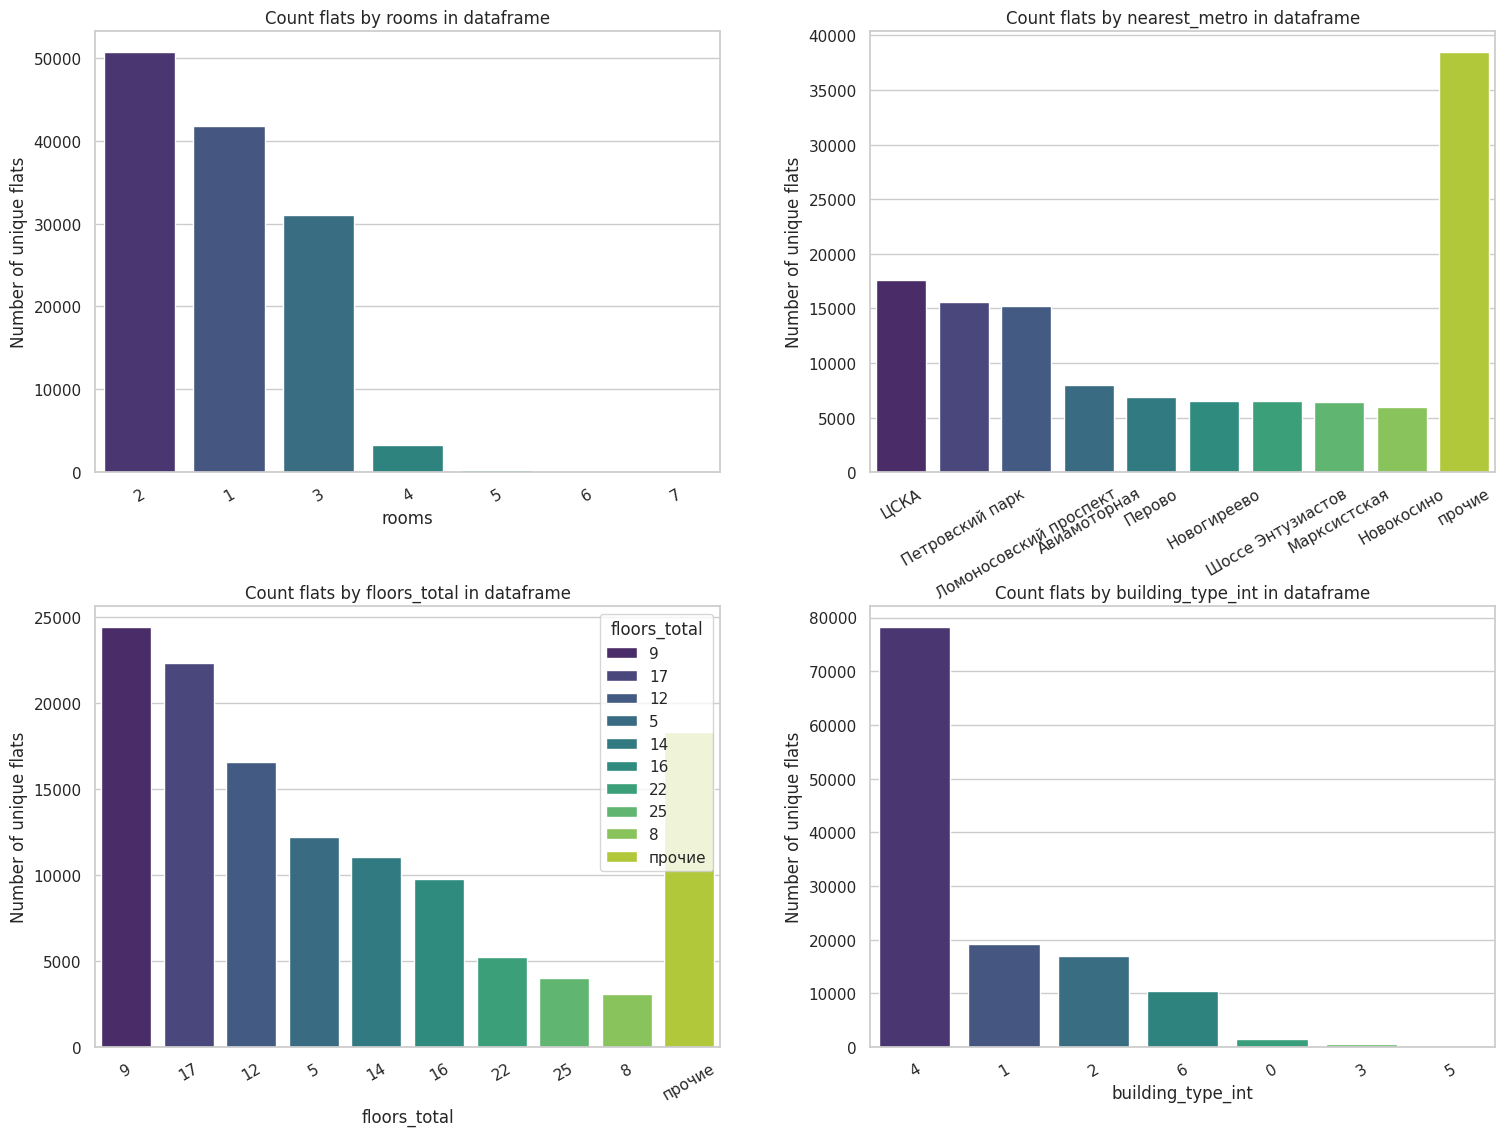

In [ ]:
df['id']=df.index
fig, axs = plt.subplots(2, 2, figsize=(16.5, 12.5))
fig.tight_layout(pad=6)
groups = ['rooms', 'nearest_metro', 'floors_total', 'building_type_int']
for i, group in enumerate(groups):
    grouped_data = df.groupby(group)['id'].nunique()
    grouped_data = group_others(grouped_data)
    sns.barplot(x=grouped_data.index, y=grouped_data.values, ax=axs[i//2, i%2], palette='viridis', hue = grouped_data.index)
    axs[i//2, i%2].set_title(f'Count flats by {group} in dataframe')
    axs[i//2, i%2].xaxis.set_ticks([str(x) for x in grouped_data.index])
    axs[i//2, i%2].set_xticklabels(grouped_data.index, rotation = 30)
    axs[i//2, i%2].set_ylabel('Number of unique flats')
    axs[i//2, i%2].set_xlabel(group)
plt.savefig(f'{ASSETS_DIR}/cat_features_1.png')
plt.show()

<div class="alert alert-block alert-success">
✔️ Замечатльно! Очень аккуртаные и понятные графики. Есть все подписи. Единственное, лучше в таких графиках считать доли, а не абсолютные значения. 
</div>



In [13]:
binary_cols = df.columns[df.nunique() == 2]

for c in binary_cols:
    df[c].replace({True: 1, False: 0}, inplace=True)
df[binary_cols]

,is_apartment,has_elevator
0,0,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
127039,0,1
127040,0,1
127041,0,1
127042,0,1



<div class="alert alert-warning">
⚠️ Всё хорошо, но только немного не хватает твоих мыслей по ходу исследования. Например, почему ты решил заменить True/False на 1 и 0 и т.д. В общем, было бы здорово добавить каких-то промежуточных мыслей и идей.
</div>



/tmp/ipykernel_3068/2459221338.py:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  counts = binary_df.apply(pd.value_counts).unstack().unstack()


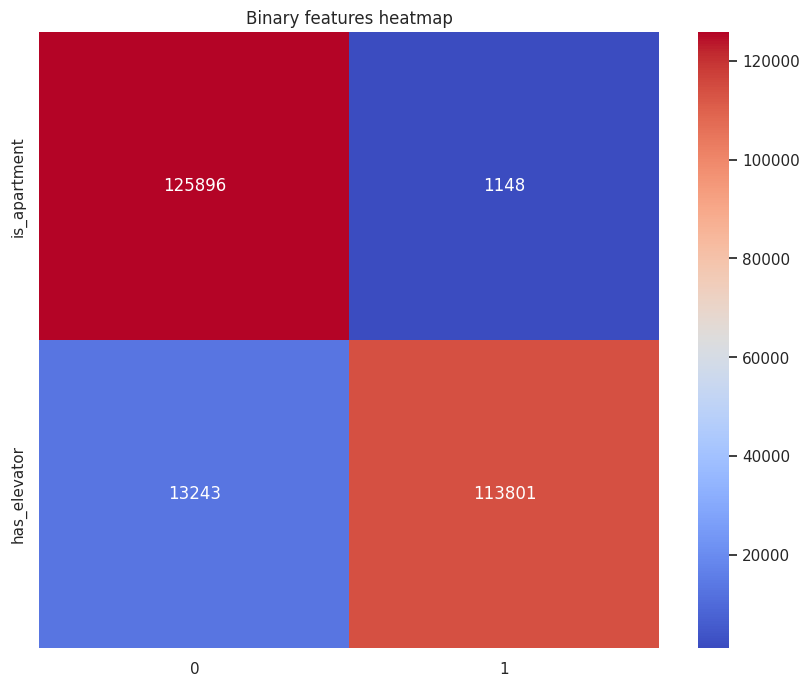

In [14]:
# Создаем таблицу с бинарными признаками
binary_df = df[binary_cols]
# Создаем таблицу с количеством раз, когда каждый признак принимает значение 1 или 0
counts = binary_df.apply(pd.value_counts).unstack().unstack()
# Создаем тепловую карту
plt.figure(figsize=(10, 8))
sns.heatmap(counts, annot=True, cmap='coolwarm', fmt=".0f")
plt.title('Binary features heatmap')
plt.savefig(f'{ASSETS_DIR}/cat_features_2_binary_heatmap.png')
plt.show()


<div class="alert alert-warning">
⚠️ Тепловая карта хорошо, но я бы ещё в процентах показал количество данных.
</div>


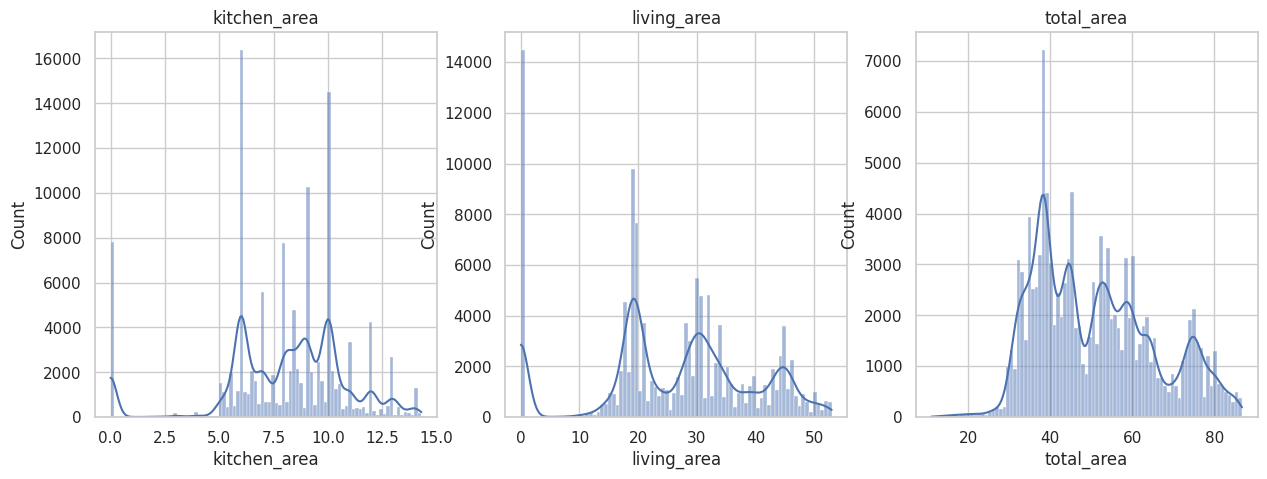

In [15]:
# список колонок, для которых будут вычисляться статистики
square_columns = [
    "kitchen_area",
    "living_area",
    "total_area",
]
# Создаем фигуру
fig, axs = plt.subplots(1, len(square_columns), figsize=(15, 5))

# Выводим графики
for i, col in enumerate(square_columns):
    data = df[col][df[col] <= df[col].quantile(0.95)]
    sns.histplot(data, ax=axs[i], kde=True)
    axs[i].set_title(col)
plt.savefig(f'{ASSETS_DIR}/histograms.png')
plt.show()



<div class="alert alert-warning">
⚠️ Отлично, есть графики. Графики можно хорошо дополнить чуть более наглядной статистикой df[col].describe()
</div>


А вот объекты где жилая площадь равна нулю надо исследовать.

<div class="alert alert-block alert-success">
✔️ Очень хорошо, что ты такое заметил! Давай разбираться)
    
    И сразу хочется глянуть, а нет ли таких странностей с ценой, комнатами, годом, высотой потолка и т.д.
</div>


In [16]:
sub = df[df['living_area']==0]
sub.sample(12)

,floor,is_apartment,kitchen_area,living_area,rooms,studio,total_area,price,build_year,building_type_int,ceiling_height,flats_count,floors_total,has_elevator,nearest_metro,distance_to_metro,id
12290,1,0,9.0,0.0,3,False,60.300000,13000000,1974,4,2.64,143,9,1,Авиамоторная,8.553696,12290
8864,8,0,6.0,0.0,2,False,49.400002,7470000,1972,4,2.64,431,9,1,Новогиреево,3.448796,8864
68173,8,0,7.5,0.0,2,False,37.900002,12450000,1962,4,2.64,71,9,1,Минская,1.481781,68173
45086,9,0,0.0,0.0,2,False,40.299999,10441730,2018,2,3.00,321,16,1,Озёрная,9.076598,45086
12576,2,0,7.4,0.0,1,False,38.599998,7200000,2013,4,2.74,260,17,1,Новокосино,8.786041,12576
10688,17,0,10.0,0.0,2,False,59.099998,10800000,2014,1,3.00,256,17,1,Озёрная,12.744398,10688
6885,7,0,0.0,0.0,1,False,36.000000,11250000,1982,4,2.64,285,12,1,ЦСКА,4.181399,6885
12899,10,0,7.0,0.0,2,False,47.000000,10250000,1975,4,2.50,383,12,1,Авиамоторная,15.915660,12899
9963,17,0,8.0,0.0,2,False,52.000000,10500000,1994,4,2.64,472,17,1,ЦСКА,17.452689,9963
8503,8,0,0.0,0.0,2,False,52.000000,11800000,1981,4,2.64,427,12,1,Шелепиха,3.356544,8503


Видимо это досадно недоразумение. Чтобы оно не вносило шум в работу модели, признаем для этих случаев жилую площадь равной общей - площадь кухни - 4,3 метров на санузлы.
В среднестатистической квартире площадью 40–45 м² (исключая сегменты бизнес и элит) под санузел отводится ориентировочно 4–4,5 м². 

<div class="alert alert-block alert-success">
✔️ Принимается!
</div>


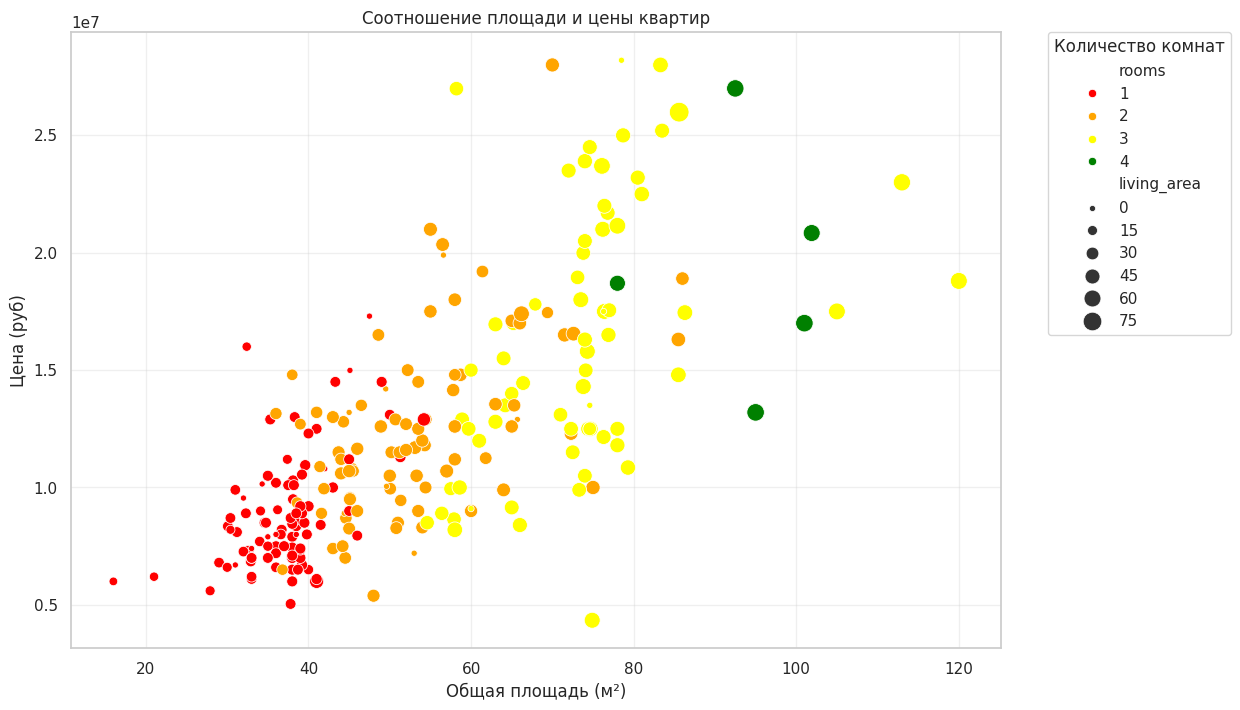

In [17]:
df1 = df.copy()
df = df.sample(250, random_state=42)

# Преобразуем размер пузырьков для лучшей визуализации
df['Размер пузырька'] = df['living_area'] * 5

# Создаем цветовую шкалу
colors = {1: 'red', 2: 'orange', 3: 'yellow', 4: 'green', 5: 'purple', 6:'blue',7:'black'}
df['Цвет'] = df['rooms'].map(colors)

# Создаем график
plt.figure(figsize=(12, 8))

# Используем seaborn для создания scatter plot
sns.scatterplot(
    x='total_area',
    y='price',
    size='living_area',
    hue='rooms',
    palette=colors,
    sizes=(20, 200),
    data=df
)

# Настраиваем оси
plt.xlabel('Общая площадь (м²)')
plt.ylabel('Цена (руб)')
plt.title('Соотношение площади и цены квартир')

# Добавляем сетку
plt.grid(True, alpha=0.3)

# Настраиваем легенду
plt.legend(title='Количество комнат', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


# Показываем график
plt.savefig(f'{ASSETS_DIR}/bubbles.png')
plt.show()

<div class="alert alert-block alert-success">
✔️ Здорово, что ты визуализируешь разные соотношения признаков. Молодец.
</div>


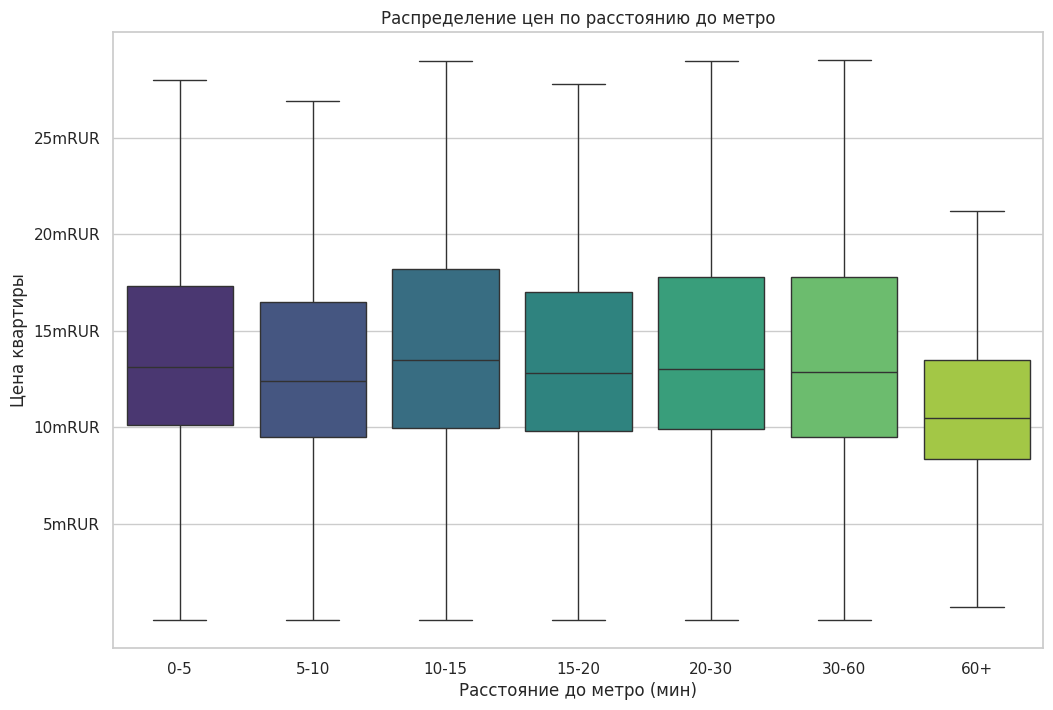

In [19]:
df = df1.copy()
# Создаем интервалы расстояния
df['Расстояние до метро (мин)']= df['distance_to_metro']/0.083333

df['Интервал'] = pd.cut(
    df['Расстояние до метро (мин)'],
    bins=[0, 5, 10, 15, 20, 30, 60, np.inf],
    labels=['0-5', '5-10', '10-15', '15-20', '20-30', '30-60','60+']
)
plt.figure(figsize=(12, 8))
df = df.sort_values(by='Интервал')
# Создаем box plot
fig = sns.boxplot(
    x='Интервал',
    y='price',
    data=df.sort_values(by='Интервал'),
    palette='viridis',
    showfliers=False,
    hue = 'Интервал'
)

# Настраиваем внешний вид
fig.set_title('Распределение цен по расстоянию до метро')
fig.set_xlabel('Расстояние до метро (мин)')
fig.set_ylabel('Цена квартиры')

# Добавляем всплывающие подсказки
fig.xaxis.set_ticks(df['Интервал'].unique())
fig.set_xticklabels(df['Интервал'].unique())
fig.yaxis.set_ticks([5000000,10000000,15000000,20000000,25000000])
fig.set_yticklabels(['5mRUR','10mRUR','15mRUR','20mRUR','25mRUR'])

# Показываем график
plt.savefig(f'{ASSETS_DIR}/time_to_metro_vs_price.png')
plt.show()


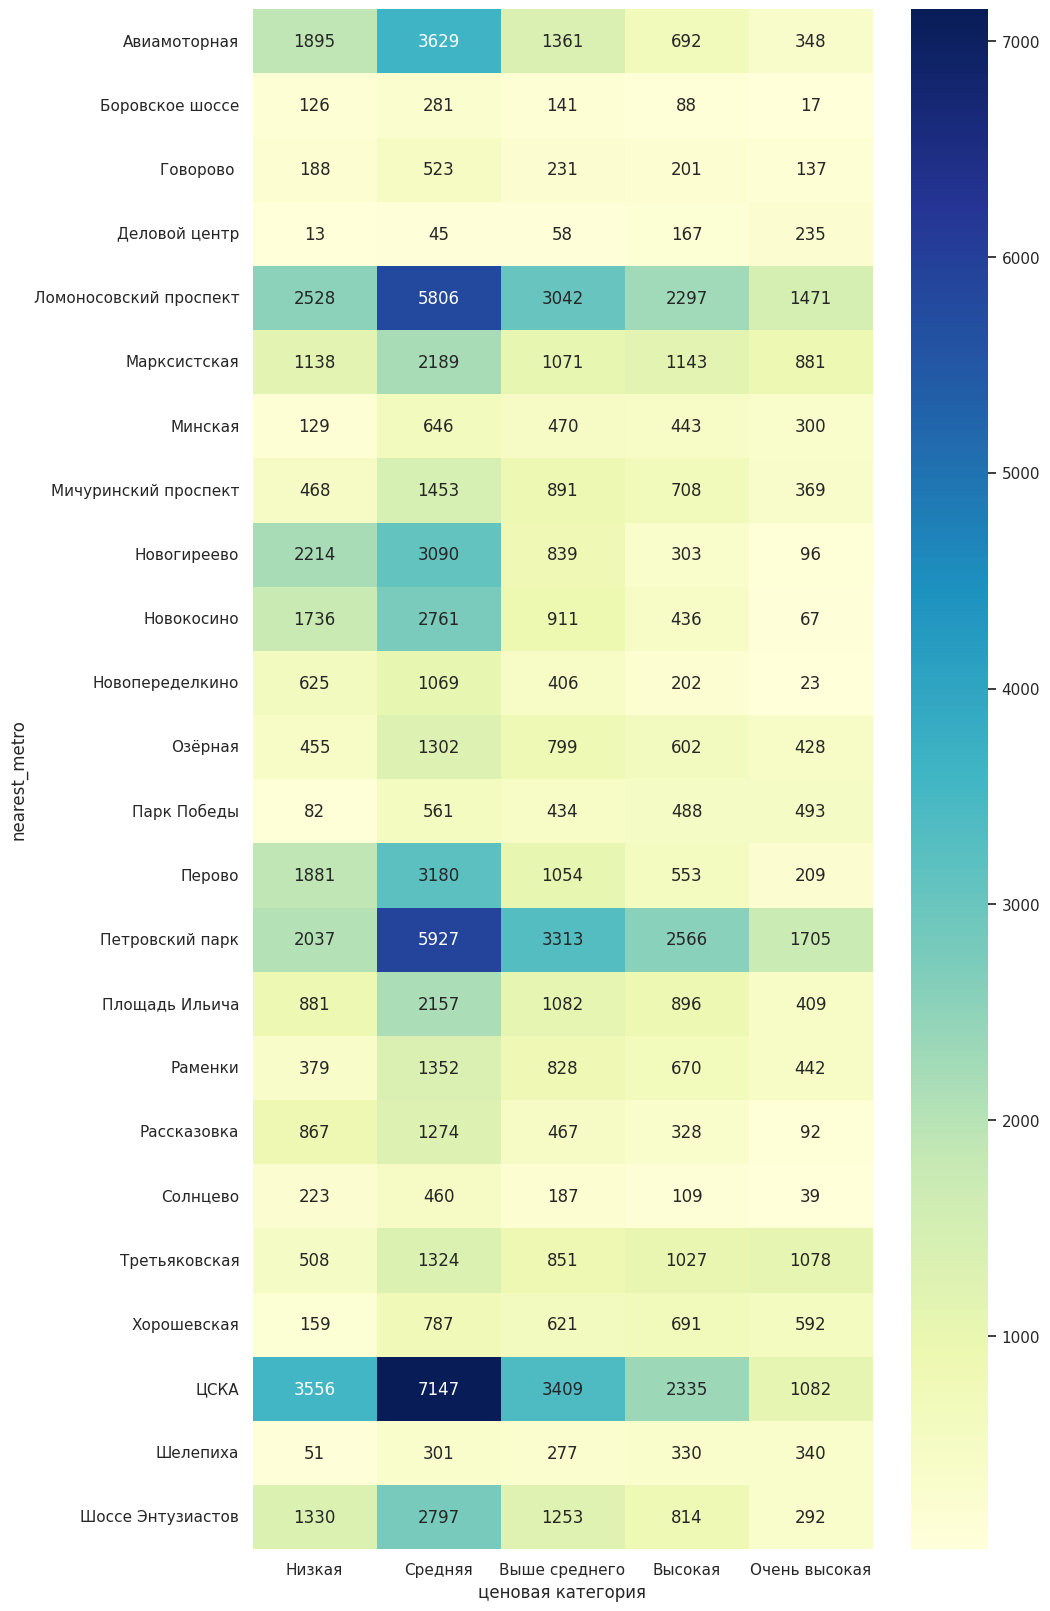

In [20]:
df= df1.copy()
#Cоздаем ценовые категории
df['ценовая категория'] = pd.cut(
    df['price'],
    bins=[3000000, 8000000, 12000000, 15000000, 20000000, np.inf],
    labels=['Низкая', 'Средняя', 'Выше среднего', 'Высокая', 'Очень высокая']
)
df['медиана рынка'] = df.groupby('nearest_metro')['price'].transform('median')
# Создаем тепловую карту
plt.figure(figsize=(10, 20))
sns.heatmap(df.pivot_table(index='nearest_metro', columns='ценовая категория', values='price', aggfunc='count'), annot=True, cmap='YlGnBu', fmt=".0f")

# Добавляем наложение медианы рынка
plt.plot(df['nearest_metro'], df['медиана рынка'], color='red', linewidth=2)
plt.savefig(f'{ASSETS_DIR}/price_dist_by_metro.png')
plt.show()

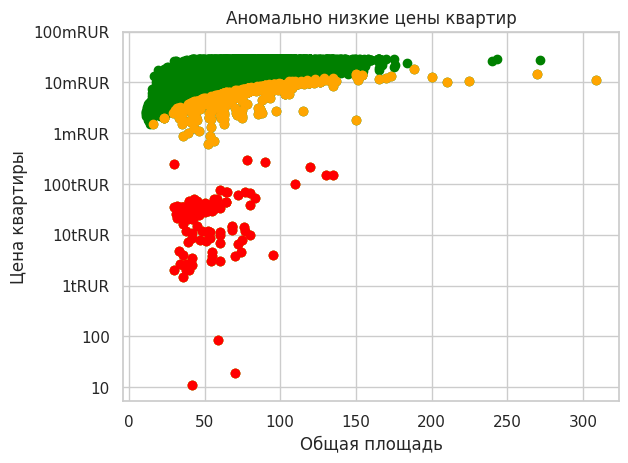

In [21]:
df['Цена_метра']= df['price']/df['total_area']
min = df['price'].quantile(0.02)
anomalies = df[df['price'] < min]
min = anomalies['Цена_метра'].quantile(0.15)
sub = df[df['Цена_метра'] < min]
sub_sub = df[df['price'] < 500000]
plt.scatter(df['total_area'], df['price'], c='green')
plt.scatter(sub['total_area'], sub['price'], c='orange')
plt.scatter(sub_sub['total_area'], sub_sub['price'], c='red')
plt.title('Аномально низкие цены квартир')
plt.xlabel('Общая площадь')
plt.gca().set_yscale('log')
plt.gca().yaxis.set_ticks([10,100,1000,10000,100000,1000000,10000000, 100000000])   
plt.gca().set_yticklabels(['10','100','1tRUR','10tRUR','100tRUR','1mRUR','10mRUR', '100mRUR']) 
plt.ylabel('Цена квартиры')
plt.savefig(f'{ASSETS_DIR}/anomalies_low.png')
plt.show()


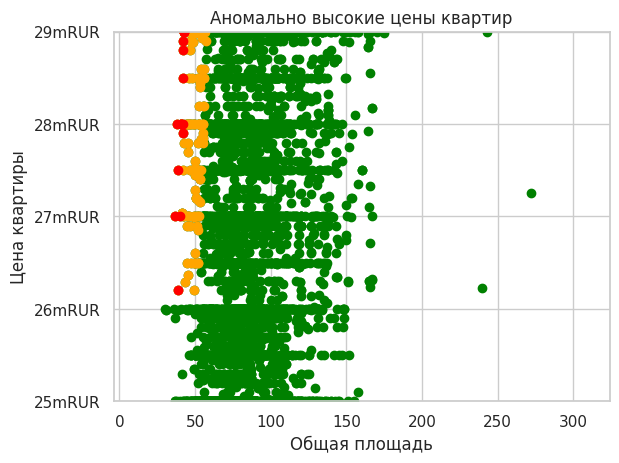

In [22]:
max = df['price'].quantile(0.98)
anomalies = df[df['price'] > max]
max = anomalies['Цена_метра'].quantile(0.95)
sub = anomalies[anomalies['Цена_метра'] > max]
sub_sub = sub[sub['Цена_метра'] > max*1.3]
plt.scatter(df['total_area'], df['price'], c='green')
plt.scatter(sub['total_area'], sub['price'], c='orange')
plt.scatter(sub_sub['total_area'], sub_sub['price'], c='red')
plt.title('Аномально высокие цены квартир')
plt.xlabel('Общая площадь')
#plt.gca().set_yscale('log')
plt.gca().set_ylim(bottom=25000000, top=29000000)

plt.gca().yaxis.set_ticks([25000000,26000000,27000000,28000000, 29000000])   
plt.gca().set_yticklabels(['25mRUR', '26mRUR','27mRUR','28mRUR','29mRUR']) 

plt.ylabel('Цена квартиры')
plt.savefig(f'{ASSETS_DIR}/anomalies_high.png')
plt.show()

*Вывод:* Визуальный анализ данных позволяет говорить о следующих особенностях набора данных:
1. Гипотеза о том, что дальность от метро однозначно определяет стоимость квартиры в Москве. Медианы на самом деле в одном диапазоне, а разброс цен очень велик, независимо от этого фактора.
2. Наблюдаются аномально низкие цены, которые по всей вероятноси обусловлены некорректным вводом данных, например введина цена аренды в месяц, вместо стоимости продажи. Есть смысл ограничить нижнуюю границу 1 млн. руб.
3. Обнаружено большое количество некорректных значений по признаку жилой площади. Нужно будет пересчитать этот показатель исходя из других параметров жилья.

<div class="alert alert-block alert-success">
✔️ Супер, есть графики, графики мне нравятся. Они весьма информативны. Также есть выводы по всем графикам.
</div>


In [23]:
markdown_text='''*Вывод:* Визуальный анализ данных позволяет говорить о следующих особенностях набора данных:
1. Гипотеза о том, что дальность от метро однозначно определяет стоимость квартиры в Москве. Медианы на самом деле в одном диапазоне, а разброс цен очень велик, независимо от этого фактора.
2. Наблюдаются аномально низкие цены, которые по всей вероятноси обусловлены некорректным вводом данных, например введина цена аренды в месяц, вместо стоимости продажи. Есть смысл ограничить нижнуюю границу 1 млн. руб.
3. Обнаружено большое количество некорректных значений по признаку жилой площади. Нужно будет пересчитать этот показатель исходя из других параметров жилья.'''
with open(f'{ASSETS_DIR}/eda_summary.md', 'w') as file:
    file.write(markdown_text)

In [ ]:
mlflow.set_experiment(EXPERIMENT_NAME)
experiment_id = mlflow.get_experiment_by_name(EXPERIMENT_NAME).experiment_id
with mlflow.start_run(run_name=f"{RUN_NAME}", experiment_id=experiment_id) as run:
    run_id = run.info.run_id
    mlflow.log_artifacts(ASSETS_DIR) 

<div class="alert alert-warning">
⚠️ Кажется, я нигде не увидел обработку дубликатов. Поправишь?)
</div>


#### Этап 3: Генерация Признаков и Обучение Новой Версии Модели

# <a id='toc2_'></a>[Предобработка данных](#toc0_)

Для начала устраним те проблемы в данных, которые выявили на предыдущем этапе анализа.  
Начнём с аномально низких значений.

In [27]:
df = df[df['price']>1000000]

Теперь заменим нули в жилой площади

In [28]:
df['living_area'] = df['total_area']- df['kitchen_area']
#Удалим странные картиры у которых площадь кухни больше общей площади
df = df[df['living_area'] >= -4.3]

<div class="alert alert-warning">
⚠️ Тут идут у тебя разные удаления строк. В таких ситуациях лучше сначала оценивать какую долю данных мы потеряем. 
</div>


In [29]:
print('Список уникальных значений в колонке "studio" = ',df['studio'].unique())
#Удалим столбец "студия" как неинформативный
df = df.drop(['studio'], axis=1)


Список уникальных значений в колонке "studio" =  [False]


<div class="alert alert-block alert-success">
✔️ С этим решением согласен
</div>


# Разделение данных

In [31]:
RANDOM_STATE = 42
random.seed(RANDOM_STATE)
X_train, X_test, y_train, y_test  = train_test_split(
    df.drop(['price'], axis=1), 
    df['price'], 
    test_size=0.3,
    random_state=RANDOM_STATE
)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=RANDOM_STATE)

<div class="alert alert-block alert-success">
✔️ Данные разделены на различные подвыборки.
</div>


In [34]:
#Убедимся, что получились похожие выборки:
descr = pd.DataFrame(columns = ['set', 'mean', 'std', 'size'])
set_di = {'train': y_train, 'val': y_val, 'test': y_test}
for label, yy in set_di.items():
    line = [label, yy.mean(), yy.std(), len(yy)]
    descr.loc[len(descr)] = line
descr

,set,mean,std,size
0,train,1.234080e+07,5.004995e+06,88819
1,val,1.232520e+07,5.004338e+06,19033
2,test,1.227435e+07,4.985016e+06,19033


<div class="alert alert-block alert-success">
✔️ Это не ошибка, но лучше отображать числа в чуть более читаемом формате. Можно просто запустить в ячейке pd.set_option('display.float_format', '{:.6f}'.format)
</div>



Вывод: Средние значения цены и разброс данных в каждом наборе данных получились весьма похожие. Количество значений выгялдит достаточным, чтобы модель нормально обучилась.

<div class="alert alert-block alert-success">
✔️ Молодец, что проверил схожесть выборок. Next level - это использование стат тестов для сравнения выборок. Мне кажется, что это даже короче будет в плане количества строк.
</div>


# <a id='toc3_'></a>[Нормализации, масштабирование или кодирование](#toc0_)

In [35]:
degree = 3
n_bins = 10
encode = 'ordinal'
strategy = 'uniform'
subsample = None

# Создаем column transformer
cats = ['is_apartment', 'rooms', 'nearest_metro', 'has_elevator']
bins = ['build_year', 'ceiling_height', 'flats_count', 'floors_total','floor']
nums = ['kitchen_area', 'living_area', 'total_area','distance_to_metro']

# Исправляем numeric_transformer - используем только один трансформер для каждой колонки
numeric_transformer = Pipeline(steps=[
    ('polynomial', PolynomialFeatures(degree=degree)),
    ('scaler', RobustScaler())
])

bin_transformer = Pipeline(steps=[
    ('KBinsDiscretizer', KBinsDiscretizer(n_bins=n_bins, encode=encode, strategy=strategy, subsample=subsample)),
    ('categorizer', TargetEncoder(target_type = 'continuous', smooth='auto')),
])

# Исправляем cats_transformer - правильный формат для ColumnTransformer
cats_transformer = ColumnTransformer([
    ('encoder', TargetEncoder(target_type = 'continuous', smooth='auto'), cats),
    ('bins_to_cats', bin_transformer, bins)
])

# Создаем pipeline
pipeline = ColumnTransformer([
    ('numeric', PolynomialFeatures(degree=degree),nums),
    ('cats_transformer', cats_transformer, bins+cats)
])


# Применяем pipeline
X_train_transformed = pipeline.fit_transform(X_train, y_train)
X_train_transformed = pd.DataFrame(
    X_train_transformed, 
    columns=pipeline.get_feature_names_out(),
    index = y_train.index
)

X_test_transformed = pipeline.transform(X_test)
X_test_transformed = pd.DataFrame(
    X_test_transformed, 
    columns=pipeline.get_feature_names_out(),
    index = y_test.index)

X_val_transformed = pipeline.transform(X_val)
X_val_transformed = pd.DataFrame(
    X_val_transformed, 
    columns=pipeline.get_feature_names_out(),
    index = y_test.index)

<div class="alert alert-warning">
⚠️ Обрати внимание, в X_val_transformed = pd.DataFrame(..., index=y_test.index) используется y_test.index, хотя логичнее использовать y_val.index
</div>

# <a id='toc4_'></a>[Генерация новых признаков](#toc0_)

In [36]:
def remove_zero_variance_features(df1):
   """
   Функция для удаления признаков с нулевой дисперсией.

   Параметры:
   ----------
   df1 : pandas.DataFrame
       Исходный DataFrame.

   Возвращает:
   ----------
   list
       Список удаленных признаков.
   """
   # Определяем порог для дисперсии
   threshold = 0.01  # Это значение может быть изменено в зависимости от ваших потребностей

   # Инициализируем VarianceThreshold из Scikit-Learn с определенным порогом
   selector = VarianceThreshold(threshold=threshold)

   # Подгоняем этот селектор к данным
   selector.fit(df1)

   # Булевый массив: True, если дисперсия признака выше порога
   features = selector.get_support(indices=True)

   # Получаем DataFrame с удаленными признаками с низкой дисперсией
   df_high_variance = df1.iloc[:, features]

   # Дополнительно, если вы хотите узнать, какие признаки были удалены:
   removed_features = [column for column in df1.columns
                       if column not in df_high_variance.columns]

   print('Удаленные признаки с нулевой дисперсией:')
   print(removed_features)
   return removed_features

<div class="alert alert-warning">
⚠️ Полезная функция, только threshold я бы вынес в параметры функции.
</div>

In [37]:
removed_features = remove_zero_variance_features(X_train_transformed)
X_train_transformed = X_train_transformed.drop(removed_features, axis=1)
X_test_transformed = X_test_transformed.drop(removed_features, axis=1)
X_val_transformed = X_val_transformed.drop(removed_features, axis=1)

Удаленные признаки с нулевой дисперсией:
['numeric__1']


In [38]:
# Подготовка списка колонок
lst = list(X_train_transformed.columns)
numeric_lst = [x for x in lst if x.startswith('numeric')]
other_lst = [x for x in lst if not x.startswith('numeric')]
transformations = ['log', 'sqrt', 'cos']

# Инициализация модели
afr = AutoFeatRegressor(
#    categorical_cols=[cats[2]],
    feateng_cols=nums,
    transformations=transformations,
    max_gb=16,
    feateng_steps=2,
    n_jobs=1,
    verbose=1
)
X_train_transformed_afr = afr.fit_transform(X_train[nums], y_train)
X_test_transformed_afr = afr.transform(X_test[nums])
X_val_transformed_afr = afr.transform(X_val[nums])

2025-03-16 09:13:33,528 INFO: [AutoFeat] The 2 step feature engineering process could generate up to 78 features.
2025-03-16 09:13:33,529 INFO: [AutoFeat] With 88819 data points this new feature matrix would use about 0.03 gb of space.
2025-03-16 09:13:33,532 INFO: [feateng] Step 1: transformation of original features


2025-03-16 09:13:36,011 INFO: [feateng] Generated 10 transformed features from 4 original features - done.
2025-03-16 09:13:36,017 INFO: [feateng] Step 2: first combination of features


2025-03-16 09:13:36,646 INFO: [feateng] Generated 91 feature combinations from 91 original feature tuples - done.
2025-03-16 09:13:36,694 INFO: [feateng] Generated altogether 103 new features in 2 steps
2025-03-16 09:13:36,696 INFO: [feateng] Removing correlated features, as well as additions at the highest level
2025-03-16 09:13:36,833 INFO: [feateng] Generated a total of 61 additional features
2025-03-16 09:13:37,012 INFO: [featsel] Feature selection run 1/5


[featsel] Scaling data...done.


2025-03-16 09:13:46,877 INFO: [featsel] Feature selection run 2/5
2025-03-16 09:13:57,184 INFO: [featsel] Feature selection run 3/5
2025-03-16 09:14:07,845 INFO: [featsel] Feature selection run 4/5
2025-03-16 09:14:18,112 INFO: [featsel] Feature selection run 5/5
2025-03-16 09:14:29,497 INFO: [featsel] 51 features after 5 feature selection runs
2025-03-16 09:14:32,450 INFO: [featsel] 18 features after correlation filtering
2025-03-16 09:14:33,456 INFO: [featsel] 17 features after noise filtering
2025-03-16 09:14:33,457 INFO: [AutoFeat] Computing 14 new features.


2025-03-16 09:14:35,667 INFO: [AutoFeat]    14/   14 new features ...done.
2025-03-16 09:14:35,676 INFO: [AutoFeat] Final dataframe with 18 feature columns (14 new).
2025-03-16 09:14:35,677 INFO: [AutoFeat] Training final regression model.
2025-03-16 09:14:36,025 INFO: [AutoFeat] Trained model: largest coefficients:
2025-03-16 09:14:36,032 INFO: 1489131.3037339114
2025-03-16 09:14:36,033 INFO: -822270.159961 * cos(distance_to_metro)
2025-03-16 09:14:36,034 INFO: 469465.258667 * kitchen_area
2025-03-16 09:14:36,034 INFO: 224024.476954 * living_area
2025-03-16 09:14:36,035 INFO: 209340.290565 * cos(distance_to_metro)*cos(kitchen_area)
2025-03-16 09:14:36,035 INFO: 174378.042731 * cos(kitchen_area)*cos(living_area)
2025-03-16 09:14:36,036 INFO: -172674.362450 * log(distance_to_metro)
2025-03-16 09:14:36,036 INFO: -142203.985607 * cos(total_area)
2025-03-16 09:14:36,037 INFO: -139926.197060 * cos(living_area)
2025-03-16 09:14:36,038 INFO: -120798.650856 * sqrt(kitchen_area)*log(distance_to

In [39]:
X_train_transformed_afr = X_train_transformed_afr.drop(nums, axis=1)
X_test_transformed_afr = X_test_transformed_afr.drop(nums, axis=1)
X_val_transformed_afr = X_val_transformed_afr.drop(nums, axis=1)

In [40]:
X_train_transformed.index = y_train.index
X_train_transformed_afr.index = y_train.index
X_test_transformed.index = y_test.index
X_test_transformed_afr.index = y_test.index
X_val_transformed.index = y_val.index
X_val_transformed_afr.index = y_val.index

In [41]:
X_mega_train = pd.concat([X_train_transformed, X_train_transformed_afr], axis=1, ignore_index=True, verify_integrity=True)
X_mega_test = pd.concat([X_test_transformed, X_test_transformed_afr], axis=1, ignore_index=True, verify_integrity=True)
X_mega_val = pd.concat([X_val_transformed, X_val_transformed_afr], axis=1, ignore_index=True, verify_integrity=True)

In [42]:
X_mega_train.columns = list(X_train_transformed.columns)+list(X_train_transformed_afr.columns)
X_mega_test.columns = list(X_test_transformed.columns)+list(X_test_transformed_afr.columns)
X_mega_val.columns = list(X_val_transformed.columns)+list(X_val_transformed_afr.columns)

Проведём для верности проверку на взаимную корреляцию получившихся признаков

In [43]:
# Create correlation matrix
corr_matrix = X_mega_train.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
# Drop features
#df.drop(to_drop, axis=1, inplace=True)
print(to_drop)

['numeric__total_area', 'numeric__kitchen_area total_area', 'numeric__living_area^2', 'numeric__living_area total_area', 'numeric__total_area^2', 'numeric__total_area distance_to_metro', 'numeric__kitchen_area^2 total_area', 'numeric__kitchen_area living_area total_area', 'numeric__kitchen_area total_area^2', 'numeric__kitchen_area total_area distance_to_metro', 'numeric__living_area^2 total_area', 'numeric__living_area total_area^2', 'numeric__living_area total_area distance_to_metro', 'numeric__total_area^3', 'numeric__total_area^2 distance_to_metro', 'numeric__total_area distance_to_metro^2', 'numeric__distance_to_metro^3', 'kitchen_area*total_area', 'distance_to_metro*living_area']


In [44]:
X_mega_train = X_mega_train.drop(to_drop, axis =1)
X_mega_test = X_mega_test.drop(to_drop, axis =1)
X_mega_val = X_mega_val.drop(to_drop, axis =1)

Обучим теперь модель на всём этом многообразии и посмотрим, что получилось.

In [45]:
cat_features = X_mega_train.select_dtypes(include='object')

fit_params = {
        'learning_rate': 0.1,
        'min_child_samples': 5,
        'depth': 6,
        'loss_function': 'RMSE',
        'random_state': RANDOM_STATE,
    }
model = CatBoostRegressor(**fit_params, cat_features=cat_features.columns.tolist())

model.fit(X_mega_train, y_train) 
print('Model  fitted sucessfully')

0:	learn: 4724481.6655051	total: 139ms	remaining: 2m 18s
1:	learn: 4474979.2942638	total: 176ms	remaining: 1m 27s
2:	learn: 4264108.5845904	total: 209ms	remaining: 1m 9s
3:	learn: 4077232.7206024	total: 244ms	remaining: 1m
4:	learn: 3915197.0953799	total: 291ms	remaining: 57.9s
5:	learn: 3771342.8503653	total: 345ms	remaining: 57.1s
6:	learn: 3652770.2312356	total: 398ms	remaining: 56.5s
7:	learn: 3547886.5316377	total: 443ms	remaining: 54.9s
8:	learn: 3456831.6494540	total: 489ms	remaining: 53.8s
9:	learn: 3379016.8996475	total: 535ms	remaining: 52.9s
10:	learn: 3307877.7260345	total: 588ms	remaining: 52.9s
11:	learn: 3251383.0786979	total: 644ms	remaining: 53s
12:	learn: 3202688.8116974	total: 682ms	remaining: 51.8s
13:	learn: 3157996.6155251	total: 715ms	remaining: 50.3s
14:	learn: 3119530.5926382	total: 743ms	remaining: 48.8s
15:	learn: 3087153.0598422	total: 770ms	remaining: 47.3s
16:	learn: 3056827.0652818	total: 808ms	remaining: 46.7s
17:	learn: 3031489.6673862	total: 855ms	rema

<div class="alert alert-block alert-success">
    Не критично. При обучении CatBoost добавляй в параметр 'verbose': 50 (свое число), чтобы выводить не все шаги подряд)
</div>



Проведём валидацию модели на тестовых данных

In [46]:

pred = model.predict(X_mega_test)
metrics ={
            'neg_mean_absolute_error': - mean_absolute_error(pred, y_test),
            'neg_root_mean_squared_error': - mean_squared_error(pred, y_test),
            'r2': r2_score(pred, y_test),
            'neg_mean_absolute_percentage_error': - mean_absolute_percentage_error(pred, y_test)
        }
metrics

{'neg_mean_absolute_error': -1978222.7732334011,
 'neg_root_mean_squared_error': -6643153612799.775,
 'r2': 0.6359830153190078,
 'neg_mean_absolute_percentage_error': -0.16272524124723925}

<div class="alert alert-block alert-success">
    Отлично, первые результаты получены.
</div>



                                         feature  importance
19      cats_transformer__encoder__nearest_metro   22.171120
2                     numeric__distance_to_metro   12.349430
11           numeric__kitchen_area living_area^2   10.224855
14                        numeric__living_area^3    9.861939
1                           numeric__living_area    8.710914
21    cats_transformer__bins_to_cats__build_year    4.604563
4              numeric__kitchen_area living_area    4.516325
29                        log(distance_to_metro)    3.788285
7                   numeric__distance_to_metro^2    2.296216
24  cats_transformer__bins_to_cats__floors_total    2.189469
28                        cos(distance_to_metro)    1.575992
18              cats_transformer__encoder__rooms    1.513985
9            numeric__kitchen_area^2 living_area    1.441725
34      distance_to_metro*cos(distance_to_metro)    1.044620
20       cats_transformer__encoder__has_elevator    1.023771
3                       

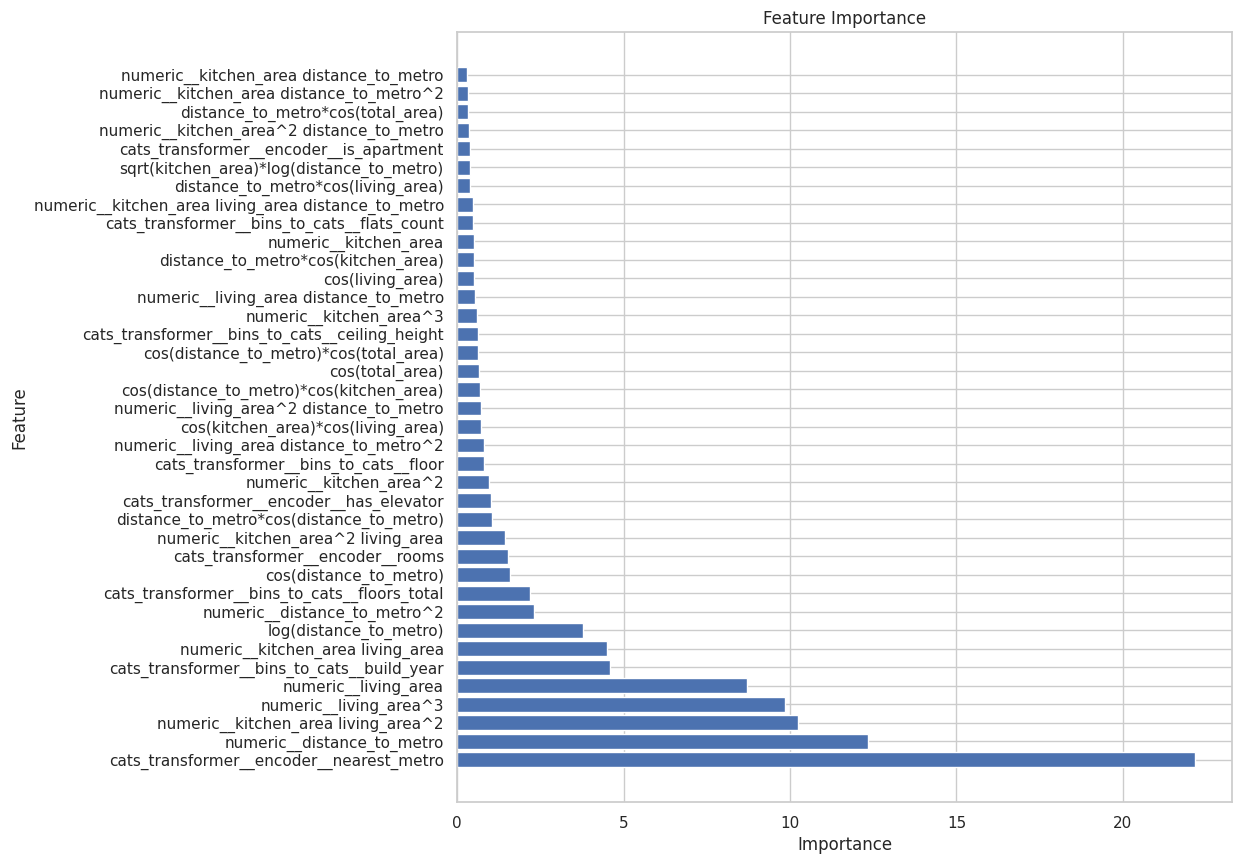

In [48]:
FS_ASSETS = 'assets/features'
# создаем объект Pool
pool = cb.Pool(X_mega_train, y_train)

# получаем важность признаков
feature_importance = model.get_feature_importance(pool)

# создаем DataFrame с важностью признаков
dfi = pd.DataFrame({'feature': X_mega_train.columns, 'importance': feature_importance})

# сортируем DataFrame по важности признаков
dfi = dfi.sort_values('importance', ascending=False)

# выводим топ-20 самых важных признаков
print(dfi.head(20))

# создаем график
plt.figure(figsize=(10, 10))
plt.barh(dfi['feature'], dfi['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.savefig(f"{FS_ASSETS}//feat_imp.png") 
plt.show()

# <a id='toc5_'></a>[Отбор признаков](#toc0_)

In [49]:
keep20 = dfi['feature'].head(40).to_list()

In [50]:
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
estimator = Lars(n_nonzero_coefs=1)

sfs = SFS(estimator, k_features=10, forward=True, floating=False, scoring='neg_mean_absolute_error', cv=2, n_jobs=-1)
sbs = SFS(estimator, k_features=10, forward=False, floating=False, scoring='neg_mean_absolute_error', cv=2, n_jobs=-1)

sfs = sfs.fit(X_mega_train[keep20], y_train)
sbs = sbs.fit(X_mega_train[keep20], y_train)

top_sfs = sfs.k_feature_names_
top_sbs = sbs.k_feature_names_

print('\nSequential Forward Selection (k=10)')
print('CV Score:')
print(sfs.k_score_)

print('\nSequential Backward Selection')
print('CV Score:')
print(sbs.k_score_)

/home/mle-user/mle_projects/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/mle-user/mle_projects/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/mle-user/mle_projects/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/mle-user/mle_projects/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/mle-user/mle_projects/.venv/lib/python


Sequential Forward Selection (k=10)
CV Score:
-2801200.3465816826

Sequential Backward Selection
CV Score:
-2801200.3465816826


<div class="alert alert-block alert-success">
✔️ Отлично!
</div>



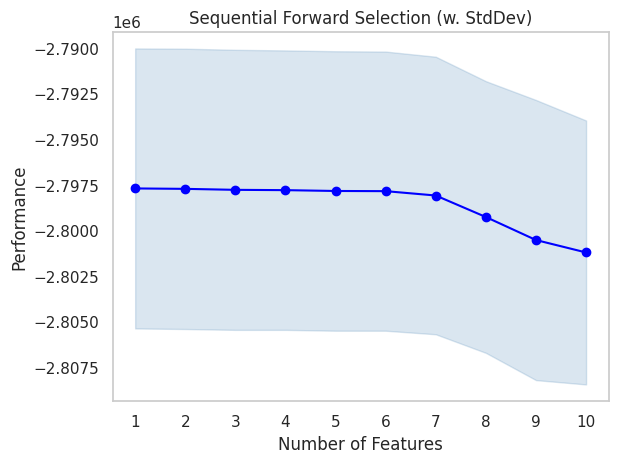

In [51]:

fig = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.savefig(f"{FS_ASSETS}//sfs.png") 
plt.show()

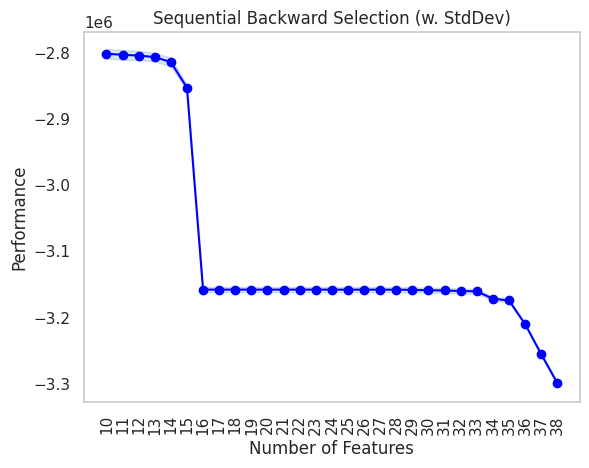

In [54]:
fig = plot_sfs(sbs.get_metric_dict(), kind='std_dev')

plt.title('Sequential Backward Selection (w. StdDev)')
plt.grid()
plt.savefig(f"{FS_ASSETS}/sbs.png") 
plt.gca().set_xticklabels(range(10,39,1), rotation = 90)
plt.show()

Вывод: Автоматизированный отбор признаков не дал результата, но это скорее связано с тем, что в его основе быстродействующая, но не походящая к случаю модель LARS, я попробовал проводить отбор на catboost, но после 40 минут ожидания понял, что это безнадёжно. Но мы попробуем переобучить catboost, используя отобранные на данном этапе признаки.

In [56]:
top_sfs =list(top_sfs)
top_sbs =list(top_sbs)
model_sfs=CatBoostRegressor(**fit_params, silent=True)
model_sbs=CatBoostRegressor(**fit_params, silent=True)
model_sfs.fit(X_mega_train[top_sfs], y_train) 
model_sbs.fit(X_mega_train[top_sbs], y_train) 
pred1 = model_sfs.predict(X_mega_test[top_sfs])
pred2 = model_sbs.predict(X_mega_test[top_sbs])
metrics1 ={
            'neg_mean_absolute_error': - mean_absolute_error(pred1, y_test),
            'neg_root_mean_squared_error': - mean_squared_error(pred1, y_test),
            'r2': r2_score(pred1, y_test),
            'neg_mean_absolute_percentage_error': - mean_absolute_percentage_error(pred1, y_test)
        }
metrics2 ={
            'neg_mean_absolute_error': - mean_absolute_error(pred2, y_test),
            'neg_root_mean_squared_error': - mean_squared_error(pred2, y_test),
            'r2': r2_score(pred2, y_test),
            'neg_mean_absolute_percentage_error': - mean_absolute_percentage_error(pred2, y_test)
        }

eva = pd.DataFrame()
eva['base'] = metrics.values()
eva['sfs'] = metrics1.values()
eva['sbs'] = metrics2.values()


In [57]:
eva.index = metrics1.keys()
eva.style.format(decimal=",", thousands=" ", precision=2)


,base,sfs,sbs
neg_mean_absolute_error,"-1 978 222,77","-2 393 733,13","-2 393 733,13"
neg_root_mean_squared_error,"-6 643 153 612 799,78","-10 165 250 447 111,67","-10 165 250 447 111,67"
r2,"0,64","0,29","0,29"
neg_mean_absolute_percentage_error,"-0,16","-0,19","-0,19"


Мы видим, что так признаки отбирать точно не стоит, так как все метрики упали и весьма значительно, если посмотерть, например на относительные показатели. 
Так что просто воспользуемся ТОП-10 метрик по версии catboost.

In [74]:
keep20 = dfi['feature'].head(10).to_list()
model_light=CatBoostRegressor(**fit_params, silent = True)
model_light.fit(X_mega_train[keep20], y_train) 
pred3 = model_light.predict(X_mega_test[keep20])
metrics3 ={
            'neg_mean_absolute_error': - mean_absolute_error(pred3, y_test),
            'neg_root_mean_squared_error': - mean_squared_error(pred3, y_test),
            'r2': r2_score(pred3, y_test),
            'neg_mean_absolute_percentage_error': - mean_absolute_percentage_error(pred3, y_test)
        }
eva['light'] = metrics3.values()
eva.style.format(decimal=",", thousands=" ", precision=2)

,base,sfs,sbs,light
neg_mean_absolute_error,"-1 978 222,77","-2 393 733,13","-2 393 733,13","-1 996 655,95"
neg_root_mean_squared_error,"-6 643 153 612 799,78","-10 165 250 447 111,67","-10 165 250 447 111,67","-6 792 117 378 934,19"
r2,"0,64","0,29","0,29","0,63"
neg_mean_absolute_percentage_error,"-0,16","-0,19","-0,19","-0,16"


Вот так, модель стало значительно шустрее, но при этом точность на уровне базового сценария, где признаков было аж 58 штук. Сохраним обучающий и тестовый набор данных для дальнейших экспериментов.

In [69]:
filtered_train = X_mega_train[keep20]
filtered_test = X_mega_test[keep20]
filtered_val = X_mega_val[keep20]
filtered_train['y']=y_train
filtered_test['y']=y_test
filtered_val['y']=y_val
filtered_train.to_csv(f"{FS_ASSETS}/f_train.csv", sep=',', index=False, encoding='utf-8')
filtered_test.to_csv(f"{FS_ASSETS}/f_test.csv", sep=',', index=False, encoding='utf-8')
filtered_val.to_csv(f"{FS_ASSETS}/f_val.csv", sep=',', index=False, encoding='utf-8')

<div class="alert alert-block alert-success">
✔️ Все хорошо.
</div>


# <a id='toc6_'></a>[Логирование в ML FLOW](#toc0_)

In [70]:
EXPERIMENT_NAME = "fit_exp" # напишите название вашего эксперимента
RUN_NAME = "fit"
mlflow.set_experiment(EXPERIMENT_NAME)
experiment_id = mlflow.get_experiment_by_name(EXPERIMENT_NAME).experiment_id
with mlflow.start_run(run_name='preprocessing', experiment_id=experiment_id) as run:
    run_id = run.info.run_id
    mlflow.log_artifacts(FS_ASSETS) 
    #Логируем трубопровод для обработки данных
    metadata = {"model_type": "preprocessing", 'structure': 'sklearn'}
    train_data = X_test.head(5)
    pred = pipeline.transform(train_data)
    signature = mlflow.models.infer_signature(train_data, pred)
    input_example = train_data
    pip_requirements = '/home/mle-user/mle_projects/yn/requirements.txt'
    model_info = mlflow.sklearn.log_model( 
		    sk_model=pipeline,
            artifact_path="models",
            registered_model_name='preprocessor',
            signature=signature,
            input_example=input_example,
            pip_requirements=pip_requirements,
            metadata = metadata,
            await_registration_for=60
		)
with mlflow.start_run(run_name='feature_generation', experiment_id=experiment_id) as run:
    run_id = run.info.run_id
    mlflow.log_artifacts(FS_ASSETS) 
    #Логируем модель на полном многообразии признаков
    metadata = {"model_type": "maximum_features", 'structure': 'catboost'}
    train_data = X_mega_test.head(5)
    pred = model.predict(train_data)
    signature = mlflow.models.infer_signature(train_data, pred)
    input_example = train_data
    pip_requirements = '/home/mle-user/mle_projects/yn/requirements.txt'
    model_info = mlflow.catboost.log_model( 
		cb_model=model,
            artifact_path="models",
            registered_model_name='maximum_features',
            signature=signature,
            input_example=input_example,
            pip_requirements=pip_requirements,
            metadata = metadata,
            await_registration_for=60
		)
    mlflow.log_params(fit_params)
    mlflow.log_metrics(metrics)
    #Логируем модель c отобраными признаками
with mlflow.start_run(run_name='feature_selection', experiment_id=experiment_id) as run:
    run_id = run.info.run_id
    mlflow.log_artifacts(FS_ASSETS) 
    metadata = {"model_type": "light", 'structure': 'catboost'}
    train_data = X_mega_test[keep20].head(5)
    pred = model_light.predict(train_data)
    signature = mlflow.models.infer_signature(train_data, pred)
    input_example = train_data
    pip_requirements = '/home/mle-user/mle_projects/yn/requirements.txt'
    model_info = mlflow.catboost.log_model( 
		cb_model=model_light,
            artifact_path="models",
            registered_model_name='light',
            signature=signature,
            input_example=input_example,
            pip_requirements=pip_requirements,
            metadata = metadata,
            await_registration_for=60
		)
    mlflow.log_metrics(metrics3)

2025/03/16 09:34:14 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'preprocessor' already exists. Creating a new version of this model...
2025/03/16 09:34:14 INFO mlflow.tracking._model_registry.client: Waiting up to 60 seconds for model version to finish creation. Model name: preprocessor, version 7
Created version '7' of model 'preprocessor'.
Registered model 'maximum_features' already exists. Creating a new version of this model...
2025/03/16 09:34:15 INFO mlflow.tracking._model_registry.client: Waiting up to 60 seconds for model version to finish creation. Model name: maximum_features, version 5
Created version '5' of model 'maximum_features'.
Registered model 'light' already exists. Creating a new version of this model...
2025/03/16 09:34:16 INFO mlflow.tracking._model_registry.client: Waiting up to 60 seconds for model version to finish creation. Model name: light, version 5
Created version '5' of model 'light'.


<div class="alert alert-block alert-success">
✔️ Залогировали всё в MLFlow, отлично!
</div>



### Этап 5 - подбор гиперпараметров и обучение новой версии модели

In [64]:
EXPERIMENT_NAME = "catb00st_optuna" # напишите название вашего эксперимента
RUN_NAME = "optuna"
FS_ASSETS = 'assets/optuna'

In [65]:
the_run_id = get_artifact_runID("f_test.csv")

local_path = client.download_artifacts(the_run_id, "f_test.csv", 'data')
test = pd.read_csv(local_path)
test.sample(5)

43e399ac1e60408db645853a91cb18e8


,cats_transformer__encoder__nearest_metro,numeric__distance_to_metro,numeric__kitchen_area living_area^2,numeric__living_area^3,numeric__living_area,cats_transformer__bins_to_cats__build_year,numeric__kitchen_area living_area,log(distance_to_metro),numeric__distance_to_metro^2,cats_transformer__bins_to_cats__floors_total,y
15031,1.449134e+07,6.748233,11616.000000,85184.000000,44.000000,1.385918e+07,264.000000,1.909281,45.538648,1.493172e+07,12900000
4561,1.319676e+07,12.609644,25346.826517,116930.166263,48.900000,1.367769e+07,518.340015,2.534462,159.003130,1.493172e+07,15950000
18559,1.324792e+07,18.707419,8262.809584,27818.124899,30.299999,1.136524e+07,272.699993,2.928920,349.967523,1.208578e+07,5500000
5572,1.181074e+07,20.863476,0.000000,700227.144193,88.800003,1.385918e+07,0.000000,3.038000,435.284627,1.159997e+07,17000000
6997,1.062199e+07,2.040916,6124.999652,15624.998212,24.999999,1.028585e+07,244.999995,0.713399,4.165337,1.208578e+07,8200000


In [66]:
the_run_id = get_artifact_runID("f_train.csv")

local_path = client.download_artifacts(the_run_id, "f_train.csv", 'data')
train = pd.read_csv(local_path)
train.sample(5)

43e399ac1e60408db645853a91cb18e8


,cats_transformer__encoder__nearest_metro,numeric__distance_to_metro,numeric__kitchen_area living_area^2,numeric__living_area^3,numeric__living_area,cats_transformer__bins_to_cats__build_year,numeric__kitchen_area living_area,log(distance_to_metro),numeric__distance_to_metro^2,cats_transformer__bins_to_cats__floors_total,y
24762,1.316958e+07,8.826640,9230.580901,58863.869433,38.900000,1.027624e+07,237.289997,2.177774,77.909577,1.159184e+07,9800000
52193,1.515604e+07,9.057291,6727.000000,29791.000000,31.000000,1.029538e+07,217.000000,2.203570,82.034512,1.209284e+07,7500000
69878,1.054979e+07,1.643655,6782.071391,25153.758719,29.300001,1.368054e+07,231.470008,0.496923,2.701603,1.208288e+07,9500000
72300,1.328305e+07,10.597769,14354.945409,49836.036649,36.800001,1.386483e+07,390.080026,2.360643,112.312704,1.492329e+07,14500000
5792,1.264028e+07,5.237632,0.000000,32768.000000,32.000000,1.442118e+07,0.000000,1.655869,27.432789,1.160401e+07,9400000


In [71]:
the_run_id = get_artifact_runID("f_val.csv")

local_path = client.download_artifacts(the_run_id, "f_val.csv", 'data')
val = pd.read_csv(local_path)
val.sample(5)

4def779e07ce4e75b0a79611dae4766b


,cats_transformer__encoder__nearest_metro,numeric__distance_to_metro,numeric__kitchen_area living_area^2,numeric__living_area^3,numeric__living_area,cats_transformer__bins_to_cats__build_year,numeric__kitchen_area living_area,log(distance_to_metro),numeric__distance_to_metro^2,cats_transformer__bins_to_cats__floors_total,y
10277,1.344174e+07,10.615286,41270.965526,253636.116365,63.299998,1.136524e+07,651.989994,2.362295,112.684298,1.208578e+07,18500000
5897,1.265387e+07,15.840009,6859.161503,24642.171969,29.100000,1.136524e+07,235.710014,2.762539,250.905882,1.208578e+07,7500000
1927,1.319676e+07,14.373736,15749.076117,81182.743437,43.300001,1.136524e+07,363.719993,2.665403,206.604284,1.208578e+07,11550000
3322,1.153701e+07,2.829855,16224.000000,140608.000000,52.000000,1.028585e+07,312.000000,1.040225,8.008080,1.159997e+07,14200000
2637,1.265387e+07,5.145110,6526.875000,25672.375000,29.500000,1.028585e+07,221.250000,1.638047,26.472156,1.159997e+07,12000000


In [72]:
X_train = train.drop(['y'], axis=1)
y_train = train['y']
X_test = test.drop(['y'], axis=1)
y_test = test['y']
X_val = val.drop(['y'], axis=1)
y_val = val['y']

Данные из ML-flow получены, теперь пора переходить к оптимизации гипер-параметров

In [ ]:
def objective(trial, X_train, X_val, y_train, y_val, experiment_id):
   """
   Функция-цель для оптимизации Optuna.

   Параметры:
   ----------
   trial : optuna.Trial
       Объект опыта Optuna.
   X_train : pandas.DataFrame
       Обучающий набор данных.
   X_test : pandas.DataFrame
       Тестовый набор данных.
   y_train : pandas.Series
       Целевая переменная для обучающего набора данных.
   y_test : pandas.Series
       Целевая переменная для тестового набора данных.
   experiment_id : str
       Идентификатор эксперимента MLflow.

   Возвращает:
   ----------
   float
       Значение метрики RMSE для тестового набора данных.
   """
   # Используем вложенные запуски для отслеживания каждого опыта в MLflow
   with mlflow.start_run(experiment_id = experiment_id, nested=True):
       # Определяем гиперпараметры для оптимизации
       params = {
           'iterations': trial.suggest_int('iterations', 100, 600),
           'depth': trial.suggest_int('depth', 2, 16),
           'min_child_samples': trial.suggest_int('min_child_samples', 2, 10),
           'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.05, 1.0),
           "subsample": trial.suggest_float("subsample", 0.05, 1.0),
           'loss_function': 'RMSE',
           'random_state': 42,
           'silent': True
       }
       
       # Логируем параметры
       for param_name, param_value in params.items():
           mlflow.log_param(param_name, param_value)
       
       # Создаем и обучаем модель
       model = CatBoostRegressor(**params)
       model.fit(X_train, y_train)
       
       # Делаем прогнозы и оцениваем
       y_pred = model.predict(X_train)
       metrics ={
           'neg_mean_absolute_error': - mean_absolute_error(y_pred, y_val),
           'neg_root_mean_squared_error': - mean_squared_error(y_pred, y_val),
           'r2': r2_score(y_pred, y_val),
           'neg_mean_absolute_percentage_error': - mean_absolute_percentage_error(y_pred, y_val)
       }
       
       # Логируем метрики
       mlflow.log_metrics(metrics)
       
       # Логируем модель
       mlflow.catboost.log_model(model, 'model')
       
       # Логируем важность признаков
       importance = pd.DataFrame({
           'feature': X_train.columns,
           'importance': model.feature_importances_
       }).sort_values('importance', ascending=False)
       
       fig, ax = plt.figure(figsize=(10, 6)), plt.axes()
       importance.plot.bar(x='feature', y='importance', ax=ax)
       plt.title('Feature Importance')
       plt.tight_layout()
       plt.savefig('feature_importance.png')
       mlflow.log_artifact('feature_importance.png')
       plt.close()
       
       print(f"Trial {trial.number}: RMSE={mean_squared_error(y_pred, y_test):.4f}, MAE={mean_absolute_error(y_pred, y_test):.4f}, R2={r2_score(y_pred, y_test):.4f}, MAPE%={mean_absolute_percentage_error(y_pred, y_test):.4f}")
       
       return mean_squared_error(y_pred, y_test)

In [77]:
def run_optimization(experiment_id):
   """
   Запускает полный процесс оптимизации.

   Параметры:
   ----------
   experiment_id : str
       Идентификатор эксперимента MLflow.

   Возвращает:
   ----------
   None
   """
   # Настройка MLflow с использованием S3
   
   # Создание и запуск исследования Optuna с отслеживанием MLflow
   with mlflow.start_run(run_name="optuna_optimization", experiment_id=experiment_id):
       mlflow.log_param("optimizer", "optuna")
       mlflow.log_param("n_trials", 10)
       
       # Создание исследования
       study = optuna.create_study(direction='minimize', 
                                   study_name='cb_hyperparameter_optimization',
                                   pruner=optuna.pruners.MedianPruner())
       
       # Оптимизация с использованием частичной функции для передачи набора данных
       study.optimize(lambda trial: objective(trial, X_train, X_val, y_train, y_val, experiment_id), 
                      n_trials=10)
       
       # Логирование информации о лучшем опыте
       mlflow.log_params({f"best_{k}": v for k, v in study.best_params.items()})
       #mlflow.log_metric("best_rmse", study.best_value)
       
       # Вывод результатов
       print("\n" + "="*50)
       print("Best trial:")
       print(f"  Value (RMSE): {study.best_value:.4f}")
       print("  Params:")
       for key, value in study.best_params.items():
           print(f"    {key}: {value}")
       
       # Обучение лучшей модели
       best_model = CatBoostRegressor(**study.best_params)
       best_model.fit(X_train, y_train)
       
       # Логирование лучшей модели
       mlflow.sklearn.log_model(best_model, "optuna")
       mlflow.log_params(study.best_params)
       pred4 = best_model.predict(X_test)
       metrics4 ={
            'neg_mean_absolute_error': - mean_absolute_error(pred4, y_test),
            'neg_root_mean_squared_error': - mean_squared_error(pred4, y_test),
            'r2': r2_score(pred4, y_test),
            'neg_mean_absolute_percentage_error': - mean_absolute_percentage_error(pred4, y_test)
        }
       mlflow.log_metrics(metrics4)

       # Генерация и логирование визуализаций оптимизации
       try:
           fig = optuna.visualization.plot_optimization_history(study)
           fig.write_image("optimization_history.png")
           mlflow.log_artifact("optimization_history.png")
           
           fig = optuna.visualization.plot_param_importances(study)
           fig.write_image("param_importances.png")
           mlflow.log_artifact("param_importances.png")
           
           fig = optuna.visualization.plot_slice(study)
           fig.write_image("slice_plot.png")
           mlflow.log_artifact("slice_plot.png")
       except Exception as e:
           print(f"Visualization error: {e}")
       
       print("\nOptimization completed. All results are logged to MLflow.")
       print(f"Best model saved with parameters: {study.best_params}")
   return metrics4

if __name__ == "__main__":
    experiment = mlflow.get_experiment_by_name(EXPERIMENT_NAME)
    if not experiment:
        experiment_id = mlflow.create_experiment(EXPERIMENT_NAME)
    else:
        experiment_id = experiment.experiment_id
    metrics4 = run_optimization(experiment_id)
    

[I 2025-03-16 09:59:25,401] A new study created in memory with name: cb_hyperparameter_optimization
[I 2025-03-16 09:59:33,022] Trial 0 finished with value: 7118572965394.087 and parameters: {'iterations': 141, 'depth': 7, 'min_child_samples': 6, 'colsample_bylevel': 0.6216612322821479, 'subsample': 0.6622083586823649}. Best is trial 0 with value: 7118572965394.087.


Trial 0: RMSE=7118572965394.0869, MAE=2035248.7439, R2=0.5973, MAPE%=0.1663


[I 2025-03-16 09:59:39,957] Trial 1 finished with value: 6963096279614.739 and parameters: {'iterations': 221, 'depth': 12, 'min_child_samples': 2, 'colsample_bylevel': 0.20404538883731294, 'subsample': 0.33807059713386095}. Best is trial 1 with value: 6963096279614.739.


Trial 1: RMSE=6963096279614.7393, MAE=2018155.6480, R2=0.6050, MAPE%=0.1648


[I 2025-03-16 09:59:45,806] Trial 2 finished with value: 8199564098605.61 and parameters: {'iterations': 499, 'depth': 3, 'min_child_samples': 3, 'colsample_bylevel': 0.07502679246083319, 'subsample': 0.24962829237110712}. Best is trial 1 with value: 6963096279614.739.


Trial 2: RMSE=8199564098605.6104, MAE=2179519.0929, R2=0.4927, MAPE%=0.1763


[I 2025-03-16 10:13:18,782] Trial 3 finished with value: 6653746794423.287 and parameters: {'iterations': 306, 'depth': 16, 'min_child_samples': 4, 'colsample_bylevel': 0.965063441353874, 'subsample': 0.5272024598012627}. Best is trial 3 with value: 6653746794423.287.


Trial 3: RMSE=6653746794423.2871, MAE=1958164.3986, R2=0.6384, MAPE%=0.1609


[I 2025-03-16 10:13:27,045] Trial 4 finished with value: 7418562898927.459 and parameters: {'iterations': 417, 'depth': 9, 'min_child_samples': 5, 'colsample_bylevel': 0.12063190832967617, 'subsample': 0.24395912361216343}. Best is trial 3 with value: 6653746794423.287.


Trial 4: RMSE=7418562898927.4590, MAE=2080459.6363, R2=0.5617, MAPE%=0.1690


[I 2025-03-16 10:13:33,934] Trial 5 finished with value: 7516449003475.772 and parameters: {'iterations': 337, 'depth': 3, 'min_child_samples': 4, 'colsample_bylevel': 0.9569689442468382, 'subsample': 0.5992051549085792}. Best is trial 3 with value: 6653746794423.287.


Trial 5: RMSE=7516449003475.7725, MAE=2092871.9278, R2=0.5609, MAPE%=0.1703


[I 2025-03-16 10:13:39,427] Trial 6 finished with value: 7397406323642.444 and parameters: {'iterations': 193, 'depth': 5, 'min_child_samples': 6, 'colsample_bylevel': 0.449675708856971, 'subsample': 0.3038738493676942}. Best is trial 3 with value: 6653746794423.287.


Trial 6: RMSE=7397406323642.4443, MAE=2074799.8042, R2=0.5727, MAPE%=0.1693


[I 2025-03-16 10:13:54,014] Trial 7 finished with value: 6861537396621.571 and parameters: {'iterations': 324, 'depth': 9, 'min_child_samples': 10, 'colsample_bylevel': 0.53273881978127, 'subsample': 0.7787238701714687}. Best is trial 3 with value: 6653746794423.287.


Trial 7: RMSE=6861537396621.5713, MAE=2001605.9028, R2=0.6148, MAPE%=0.1637


[I 2025-03-16 10:14:05,242] Trial 8 finished with value: 6909996017221.088 and parameters: {'iterations': 268, 'depth': 9, 'min_child_samples': 3, 'colsample_bylevel': 0.6617262973113647, 'subsample': 0.2722429805275502}. Best is trial 3 with value: 6653746794423.287.


Trial 8: RMSE=6909996017221.0879, MAE=2007487.5948, R2=0.6124, MAPE%=0.1641


[I 2025-03-16 10:14:10,432] Trial 9 finished with value: 7603759721998.794 and parameters: {'iterations': 222, 'depth': 9, 'min_child_samples': 2, 'colsample_bylevel': 0.1080818197479103, 'subsample': 0.40956002060895286}. Best is trial 3 with value: 6653746794423.287.


Trial 9: RMSE=7603759721998.7939, MAE=2104081.3793, R2=0.5482, MAPE%=0.1704

Best trial:
  Value (RMSE): 6653746794423.2871
  Params:
    iterations: 306
    depth: 16
    min_child_samples: 4
    colsample_bylevel: 0.965063441353874
    subsample: 0.5272024598012627
Learning rate set to 0.217847
0:	learn: 4347158.9940909	total: 2.57s	remaining: 13m 4s
1:	learn: 3859726.0637299	total: 5.29s	remaining: 13m 24s
2:	learn: 3519951.9730563	total: 7.65s	remaining: 12m 52s
3:	learn: 3274343.2917222	total: 10.2s	remaining: 12m 49s
4:	learn: 3101387.7201588	total: 12.6s	remaining: 12m 37s
5:	learn: 2982163.8866571	total: 15s	remaining: 12m 28s
6:	learn: 2896318.3751296	total: 17.4s	remaining: 12m 22s
7:	learn: 2838233.1780907	total: 19.7s	remaining: 12m 13s
8:	learn: 2788866.2297204	total: 22.1s	remaining: 12m 8s
9:	learn: 2750767.3767673	total: 24.5s	remaining: 12m 5s
10:	learn: 2721823.7667731	total: 26.9s	remaining: 12m 1s
11:	learn: 2697487.9260603	total: 29.3s	remaining: 11m 57s
12:	learn:

In [78]:
eva['optuna'] = metrics4.values()
eva.style.format(decimal=",", thousands=" ", precision=2)

,base,sfs,sbs,light,optuna
neg_mean_absolute_error,"-1 978 222,77","-2 393 733,13","-2 393 733,13","-1 996 655,95","-1 941 914,76"
neg_root_mean_squared_error,"-6 643 153 612 799,78","-10 165 250 447 111,67","-10 165 250 447 111,67","-6 792 117 378 934,19","-6 532 666 756 199,28"
r2,"0,64","0,29","0,29","0,63","0,66"
neg_mean_absolute_percentage_error,"-0,16","-0,19","-0,19","-0,16","-0,16"


<div class="alert alert-block alert-success">
✔️ Кажется, оptuna дала немного результата)
</div>



In [80]:
# Создание экземпляра модели CatBoostRegressor
clf = CatBoostRegressor(random_state=42, silent=True, loss_function='RMSE')

# Определение сетки параметров для поиска
param_grid = {
   "iterations": [100, 300],
   "depth": [2, 16],
   'min_child_samples': [2, 10],
   'colsample_bylevel': [0.05, 1.0],
   'subsample': [0.05, 1.0]
}

# Создание экземпляра HalvingGridSearchCV с использованием модели и сетки параметров
search = HalvingGridSearchCV(clf, param_grid, factor=2, max_resources=30)

# Обучение модели с использованием HalvingGridSearchCV
search.fit(X_train, y_train)

# Вывод лучших параметров, найденных в процессе поиска
search.best_params_

{'colsample_bylevel': 0.05,
 'depth': 16,
 'iterations': 100,
 'min_child_samples': 2,
 'subsample': 1.0}

In [81]:
EXPERIMENT_NAME = "HalvingGridSearchCV"  # Напишите название вашего эксперимента
RUN_NAME = "HalvingGrid"

# Получение эксперимента по имени
experiment = mlflow.get_experiment_by_name(EXPERIMENT_NAME)

# Если эксперимент не существует, создаем новый
if not experiment:
   experiment_id = mlflow.create_experiment(EXPERIMENT_NAME)
else:
   experiment_id = experiment.experiment_id

# Запуск нового запуска MLflow
with mlflow.start_run(run_name=RUN_NAME, experiment_id=experiment_id):
   # Логирование лучших параметров, найденных в процессе поиска
   mlflow.log_params(search.best_params_)
   
   # Создание экземпляра модели CatBoostRegressor с использованием лучших параметров
   clf = CatBoostRegressor(**search.best_params_, random_state=42, silent=True, loss_function='RMSE')
   
   # Обучение модели
   clf.fit(X_train, y_train)
   
   # Предсказание на тестовом наборе данных
   y_pred = clf.predict(X_test)
   
   # Вычисление метрик
   metrics = {
       'neg_mean_absolute_error': -mean_absolute_error(y_pred, y_test),
       'neg_root_mean_squared_error': -mean_squared_error(y_pred, y_test),
       'r2': r2_score(y_pred, y_test),
       'neg_mean_absolute_percentage_error': -mean_absolute_percentage_error(y_pred, y_test)
   }
   
   # Логирование метрик
   mlflow.log_metrics(metrics)
   
   # Логирование модели
   mlflow.catboost.log_model(clf, "HalvingGridSearchCV")

In [82]:
eva['grid_search'] = metrics.values()
eva.style.format(decimal=",", thousands=" ", precision=2)

,base,sfs,sbs,light,optuna,grid_search
neg_mean_absolute_error,"-1 978 222,77","-2 393 733,13","-2 393 733,13","-1 996 655,95","-1 941 914,76","-2 207 777,55"
neg_root_mean_squared_error,"-6 643 153 612 799,78","-10 165 250 447 111,67","-10 165 250 447 111,67","-6 792 117 378 934,19","-6 532 666 756 199,28","-8 466 640 730 370,53"
r2,"0,64","0,29","0,29","0,63","0,66","0,48"
neg_mean_absolute_percentage_error,"-0,16","-0,19","-0,19","-0,16","-0,16","-0,18"


In [88]:
# Получение всех запусков из эксперимента
exps = client.search_experiments()
e_names ={}
runs = pd.DataFrame()
for x in exps:
   e_names[x.experiment_id]=x.name
   runs = pd.concat([runs,mlflow.search_runs(experiment_ids=x.experiment_id)], axis=0)

runs= runs[runs['status']=='FINISHED']
runs['experiment_name']=runs['experiment_id'].map(e_names)
runs.head(4)

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.neg_mean_absolute_error,metrics.neg_mean_absolute_percentage_error,metrics.neg_root_mean_squared_error,metrics.r2,params.depth,params.iterations,params.min_child_samples,params.colsample_bylevel,params.subsample,tags.mlflow.log-model.history,tags.mlflow.source.name,tags.mlflow.user,tags.mlflow.runName,tags.mlflow.source.type,metrics.best_rmse,params.random_state,params.loss_function,params.silent,params.n_trials,params.best_colsample_bylevel,params.optimizer,params.best_min_child_samples,params.best_subsample,params.best_iterations,params.best_depth,tags.mlflow.parentRunId,params.learning_rate,metrics.score_time,metrics.test_neg_mean_absolute_error,metrics.test_r2,metrics.test_neg_root_mean_squared_error,metrics.fit_time,metrics.test_neg_mean_absolute_percentage_error,params.allow_writing_files,params.cat_features,experiment_name
0,b2536bfc925b4d0f9728f21228cd7c5e,21,FINISHED,s3://s3-student-mle-20250130-833968fcc1/21/b25...,2025-03-16 10:31:11.506000+00:00,2025-03-16 10:31:14.072000+00:00,-2.207778e+06,-0.179280,-8.466641e+12,0.475951,16,100,2,0.05,1.0,"[{""run_id"": ""b2536bfc925b4d0f9728f21228cd7c5e""...",/home/mle-user/mle_projects/.venv/lib/python3....,mle-user,HalvingGrid,LOCAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HalvingGridSearchCV
1,9732b3ffa7fd4198b99c025e6c8a570b,21,FINISHED,s3://s3-student-mle-20250130-833968fcc1/21/973...,2025-03-11 15:35:36.045000+00:00,2025-03-11 15:35:38.728000+00:00,-2.214775e+06,-0.179303,-8.545410e+12,0.459936,16,100,2,0.05,1.0,"[{""run_id"": ""9732b3ffa7fd4198b99c025e6c8a570b""...",/home/mle-user/mle_projects/.venv/lib/python3....,mle-user,HalvingGrid,LOCAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HalvingGridSearchCV
0,6cad42be69b54248bda23f0974f4f4b8,20,FINISHED,s3://s3-student-mle-20250130-833968fcc1/20/6ca...,2025-03-11 15:24:38.172000+00:00,2025-03-11 15:24:53.201000+00:00,-1.985097e+06,-0.163241,-6.728112e+12,0.626110,9,313,9,0.4468366710418784,0.8030672847531847,"[{""run_id"": ""6cad42be69b54248bda23f0974f4f4b8""...",/home/mle-user/mle_projects/.venv/lib/python3....,mle-user,casual-tern-62,LOCAL,NaN,42,RMSE,True,None,None,None,None,None,None,None,b9a418608df841df80d8d1b28a4f5452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,catb00st_optuna
1,e9fe01ef16f94de8806f60c7b3b48bea,20,FINISHED,s3://s3-student-mle-20250130-833968fcc1/20/e9f...,2025-03-11 15:24:31.126000+00:00,2025-03-11 15:24:38.147000+00:00,-2.110391e+06,-0.171398,-7.678403e+12,0.542037,2,348,5,0.507038037992098,0.7246823180262065,"[{""run_id"": ""e9fe01ef16f94de8806f60c7b3b48bea""...",/home/mle-user/mle_projects/.venv/lib/python3....,mle-user,dazzling-snake-765,LOCAL,NaN,42,RMSE,True,None,None,None,None,None,None,None,b9a418608df841df80d8d1b28a4f5452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,catb00st_optuna


In [112]:
def scatter_metric(metr, ax):
    custom_lines = [Line2D([0], [0], color='green', lw=2),
                Line2D([0], [0], color='orange', lw=2),
                Line2D([0], [0], color='grey', lw=2)]
    r2s =runs.dropna(subset=['metrics.r2']).sort_values(by='end_time', ascending=False)
    #r2s = r2s[r2s['end_time']>='2025-03-16']
    color =dict(zip(['HalvingGridSearchCV', 'catb00st_optuna', 'fit_exp'],['green','orange','grey']))
    colors = [color[x] for x in r2s['experiment_name']]
    ax = sns.scatterplot(x=r2s['run_id'],y=metr,data=r2s, c=colors, ax=ax)
    ax.legend(custom_lines, ['HalvingGridSearchCV', 'catb00st_optuna', 'fit_exp'],loc='best')
    ax.xaxis.set_major_locator(ticker.NullLocator())
    return ax

In [ ]:
metrs = ['metrics.r2',	'metrics.neg_mean_absolute_error',	'metrics.neg_mean_absolute_percentage_error',	'metrics.neg_root_mean_squared_error']
fig, axs = plt.subplots(2, 2, figsize=(16.5, 12.5))
fig.tight_layout(pad=6)
for i, metr in enumerate(metrs):
    axs[i//2, i%2] = scatter_metric(metr, axs[i//2, i%2])
plt.show()

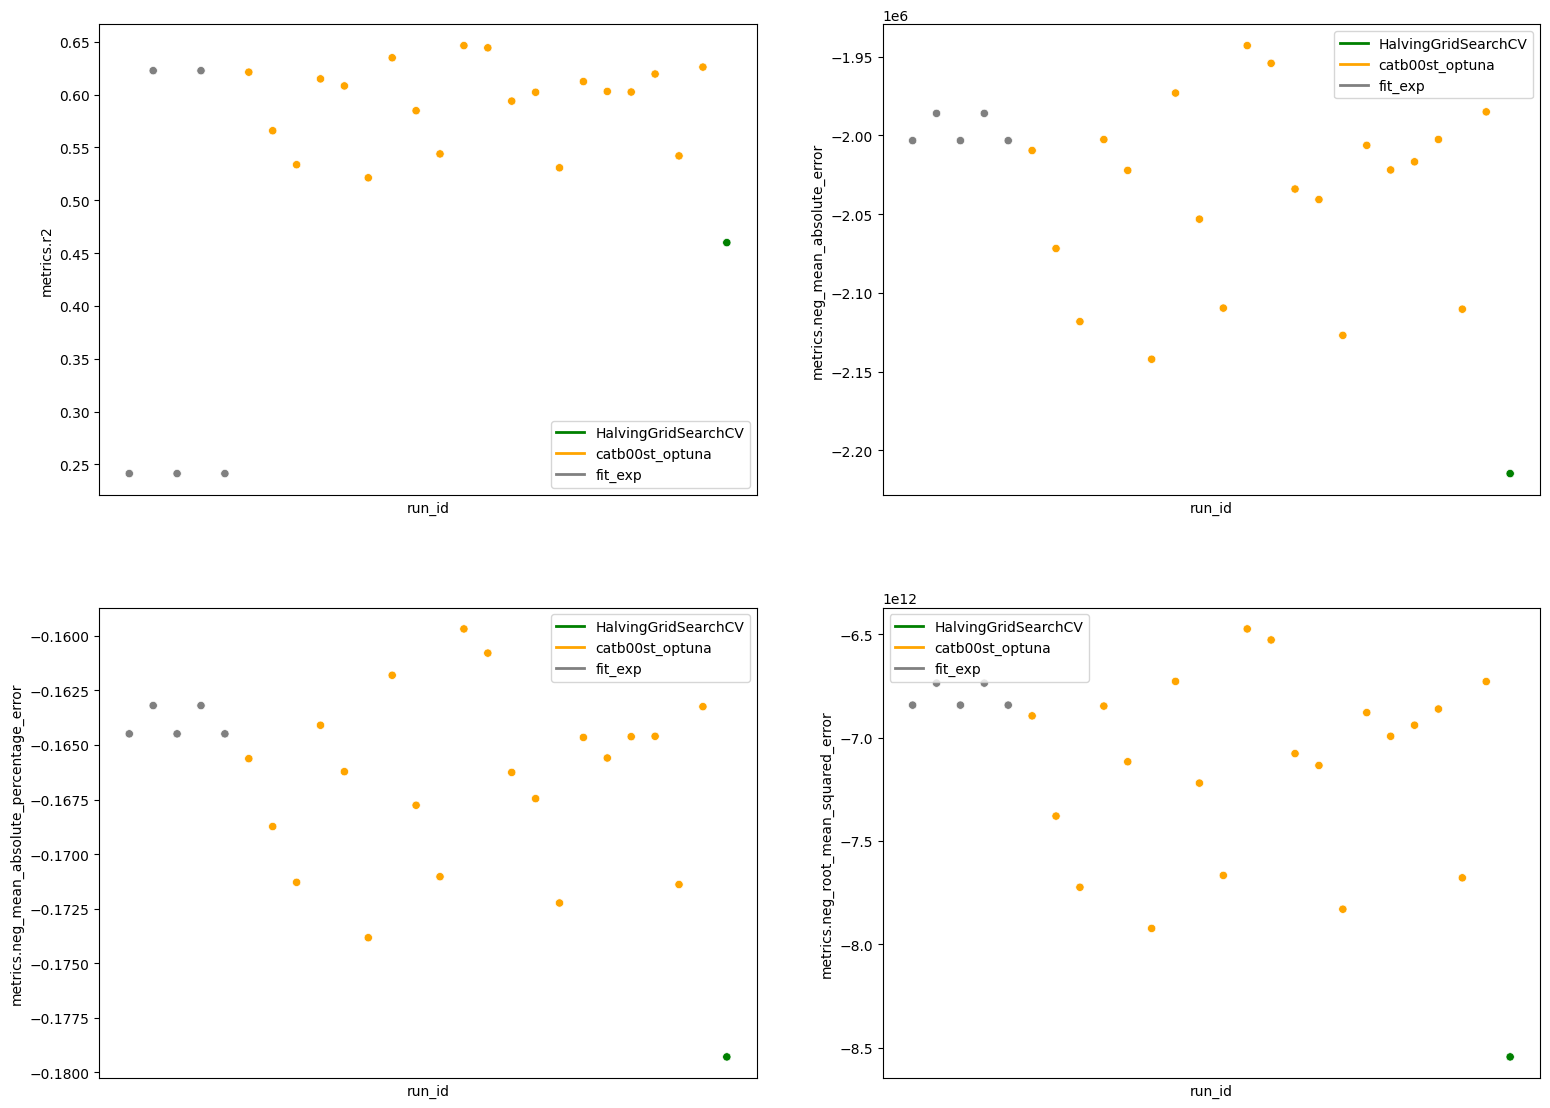

*Вывод*: Сранение метрик позволяет сделать вывод, что наилучшие результаты были достигнута на одном из триалов при работе модуля optuna.
При этом драматического улучшенния по сравнению с базовой моделью достигнуто не было. Но никто особо и не рассчитывал, что оптимизация гипер-параметров даст больший эффект, чем предобработка данных.

**Глобальный вывод по исследованию**  
Гипотеза пока себя не оправдывает. Не получется создать модель, дающую приемлемую точность оценки квартиры. Когда система ошибается при оценке квартиры в пару миллионов, что покупатель, что продавец, скорее будут испытывать только раздражение.


<div class="alert alert-block alert-success">
✔️ Отлично! Все основные способы отборов фичей использованы.
</div>



<b>Комментарий от ревьюера v1</b>


    
# Общий вывод
<div class="alert alert-block alert-success">

Спасибо за работу, у тебя получился отличный проект, мне было приятно его проверять! Удалось протестировать различные алгоритмы для отбора фичей. Был проведен детальный EDA и предобработка данных.\
Код чистый, есть необходимы комментари.\
Есть небольшие советы, просьба ознакомиться с ними. Я готов принять твой проект, если у тебя нет ко мне вопросов - присылай мне его обратно и я его приму.\
Если есть вопросы или желание улучшить твой проект - оставь вопросы комментарии после этой ячейки. Постараюсь тебе помочь с ответами и улучшением твоего проекта! 
</div>